In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup


pd.set_option('display.max_columns', 500)

In [2]:
stats_page = requests.get('https://www.basketball-reference.com/leagues/NBA_2019_per_game.html')

In [3]:
content = stats_page.content

In [4]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table', attrs={'id':'per_game_stats'})

In [5]:
table_str = str(table)
df = pd.read_html(table_str)[0]

df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [6]:
df.shape

(734, 30)

In [7]:
df.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
729,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,.571,0.0,0.0,NaN,4.0,7.0,.571,.571,3.5,4.5,.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
730,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,.553,0.0,0.0,NaN,3.1,5.6,.553,.553,1.6,2.2,.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
731,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,.559,0.0,0.0,NaN,3.6,6.4,.559,.559,1.7,2.1,.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
732,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,.580,0.0,0.0,NaN,3.4,5.8,.580,.580,1.7,2.0,.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5
733,530,Ivica Zubac,C,21,LAC,26,25,20.2,3.8,7.2,.538,0.0,0.0,NaN,3.8,7.2,.538,.538,1.7,2.3,.733,2.3,5.3,7.7,1.5,0.4,0.9,1.4,2.5,9.4


In [8]:
nba_years = np.arange(1950, 2020, 1)
nba_url = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

df = pd.DataFrame()

for year in nba_years:
    req_url = nba_url.format(year)
    page = requests.get(req_url)
    content = page.content
    soup = BeautifulSoup(content, 'html.parser')
    table = soup.find(name='table', attrs={'id':'per_game_stats'})
    df2 = pd.read_html(str(table))[0]
    df2['Year'] = year
    df2['Lge'] = 'NBA'
    
    df = pd.concat([df, df2])
    
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Lge
0,1,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,2.3,8.2,.279,NaN,NaN,NaN,2.3,8.2,.279,.279,2.7,3.8,.705,NaN,NaN,NaN,2.8,NaN,NaN,NaN,3.4,7.3,1950,NBA
1,2,Cliff Barker,SG,29,INO,49,NaN,NaN,2.1,5.6,.372,NaN,NaN,NaN,2.1,5.6,.372,.372,1.5,2.2,.708,NaN,NaN,NaN,2.2,NaN,NaN,NaN,2.0,5.7,1950,NBA
2,3,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,2.6,7.4,.349,NaN,NaN,NaN,2.6,7.4,.349,.349,1.3,1.9,.698,NaN,NaN,NaN,2.1,NaN,NaN,NaN,2.9,6.5,1950,NBA
3,4,Ed Bartels,F,24,TOT,15,NaN,NaN,1.5,5.7,.256,NaN,NaN,NaN,1.5,5.7,.256,.256,1.3,2.3,.559,NaN,NaN,NaN,1.3,NaN,NaN,NaN,1.9,4.2,1950,NBA
4,4,Ed Bartels,F,24,DNN,13,NaN,NaN,1.6,6.3,.256,NaN,NaN,NaN,1.6,6.3,.256,.256,1.3,2.4,.548,NaN,NaN,NaN,1.5,NaN,NaN,NaN,2.1,4.5,1950,NBA


In [9]:
df.shape

(27101, 32)

In [10]:
baa_years = [1947, 1948, 1949]
baa_url = 'https://www.basketball-reference.com/leagues/BAA_{}_per_game.html'

for year in baa_years:
    req_url = baa_url.format(year)
    page = requests.get(req_url)
    content = page.content
    soup = BeautifulSoup(content, 'html.parser')
    table = soup.find(name='table', attrs={'id':'per_game_stats'})
    df2 = pd.read_html(str(table))[0]
    df2['Year'] = year
    df2['Lge'] = 'BAA'
    
    df = pd.concat([df, df2])
    
aba_years = np.arange(1968, 1976, 1)
aba_url = 'https://www.basketball-reference.com/leagues/ABA_{}_per_game.html'

for year in aba_years:
    req_url = aba_url.format(year)
    page = requests.get(req_url)
    content = page.content
    soup = BeautifulSoup(content, 'html.parser')
    table = soup.find(name='table', attrs={'id':'per_game_stats'})
    df2 = pd.read_html(str(table))[0]
    df2['Year'] = year
    df2['Lge'] = 'ABA'
    
    df = pd.concat([df, df2])
    
df.shape

(29237, 32)

In [11]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Lge
0,1,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,2.3,8.2,.279,NaN,NaN,NaN,2.3,8.2,.279,.279,2.7,3.8,.705,NaN,NaN,NaN,2.8,NaN,NaN,NaN,3.4,7.3,1950,NBA
1,2,Cliff Barker,SG,29,INO,49,NaN,NaN,2.1,5.6,.372,NaN,NaN,NaN,2.1,5.6,.372,.372,1.5,2.2,.708,NaN,NaN,NaN,2.2,NaN,NaN,NaN,2.0,5.7,1950,NBA
2,3,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,2.6,7.4,.349,NaN,NaN,NaN,2.6,7.4,.349,.349,1.3,1.9,.698,NaN,NaN,NaN,2.1,NaN,NaN,NaN,2.9,6.5,1950,NBA
3,4,Ed Bartels,F,24,TOT,15,NaN,NaN,1.5,5.7,.256,NaN,NaN,NaN,1.5,5.7,.256,.256,1.3,2.3,.559,NaN,NaN,NaN,1.3,NaN,NaN,NaN,1.9,4.2,1950,NBA
4,4,Ed Bartels,F,24,DNN,13,NaN,NaN,1.6,6.3,.256,NaN,NaN,NaN,1.6,6.3,.256,.256,1.3,2.4,.548,NaN,NaN,NaN,1.5,NaN,NaN,NaN,2.1,4.5,1950,NBA


In [12]:
df.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Lge
145,125,Hank Williams,SF,22,UTS,39,NaN,11.6,1.8,4.2,.436,0.1,0.6,.136,1.7,3.6,.482,.445,0.5,0.6,.783,0.8,1.5,2.3,0.6,0.4,0.1,0.8,1.9,4.2,1975,ABA
146,126,Milt Williams,PG,29,SSL,4,NaN,23.8,2.8,4.8,.579,0.0,0.0,NaN,2.8,4.8,.579,.579,0.0,0.0,NaN,1.0,2.3,3.3,3.0,2.5,0.0,2.5,2.5,5.5,1975,ABA
147,127,John Williamson,SG,23,NYA,75,NaN,25.0,4.9,10.2,.482,0.0,0.2,.231,4.9,10.1,.486,.484,1.6,2.0,.837,0.7,1.3,2.0,2.6,0.8,0.3,2.0,2.5,11.5,1975,ABA
148,128,Willie Wise,SF,27,VIR,16,NaN,35.9,8.0,18.5,.432,0.1,0.3,.250,7.9,18.3,.435,.434,4.8,6.9,.694,2.0,4.4,6.4,3.4,1.6,0.2,2.8,3.1,20.9,1975,ABA
149,129,Dennis Wuycik,SF,24,SSL,25,NaN,8.8,1.4,3.0,.459,0.0,0.0,.000,1.4,2.9,.466,.459,0.4,0.8,.579,0.7,0.8,1.5,0.7,0.2,0.0,1.0,1.6,3.2,1975,ABA


In [13]:
df.describe()

,Year
count,29237.000000
mean,1991.729521
std,19.138099
min,1947.000000
25%,1977.000000
50%,1995.000000
75%,2008.000000
max,2019.000000


In [14]:
willie = df[df['Player'] == 'Willie Wise']
willie

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Lge
366,293,Willie Wise,SF,29,DEN,75,NaN,18.7,3.2,6.8,.462,NaN,NaN,NaN,3.2,6.8,.462,.462,1.9,2.9,.651,1.0,2.4,3.4,1.9,0.8,0.2,NaN,2.4,8.2,1977,NBA
385,283,Willie Wise,SF,30,SEA,2,NaN,5.0,0.0,1.5,.000,NaN,NaN,NaN,0.0,1.5,.000,.000,0.5,2.0,.250,1.0,0.5,1.5,0.0,0.0,0.0,0.0,1.0,0.5,1978,NBA
209,151,Willie Wise,PF,22,LAS,82,NaN,33.0,5.9,12.4,.476,0.0,0.2,.235,5.8,12.2,.480,.478,3.4,5.2,.651,3.5,8.2,11.6,2.5,NaN,NaN,2.3,3.7,15.2,1970,ABA
196,136,Willie Wise,SF,23,UTS,82,NaN,32.6,6.0,12.9,.464,0.1,0.2,.294,5.9,12.7,.466,.466,3.8,5.7,.668,3.7,6.1,9.8,2.5,NaN,NaN,2.2,3.6,15.8,1971,ABA
199,148,Willie Wise,SF,24,UTS,84,NaN,39.3,8.8,17.5,.505,0.1,0.2,.333,8.8,17.3,.507,.507,5.5,7.5,.725,3.4,7.3,10.6,3.4,NaN,NaN,3.4,3.6,23.2,1972,ABA
162,136,Willie Wise,SF,25,UTS,83,NaN,37.7,8.1,16.9,.479,0.0,0.2,.167,8.1,16.7,.483,.480,5.7,7.3,.784,2.6,5.6,8.2,3.3,NaN,NaN,2.8,3.3,22.0,1973,ABA
175,126,Willie Wise,SF,26,UTS,82,NaN,40.1,8.7,17.8,.490,0.0,0.2,.125,8.7,17.6,.494,.490,4.8,6.1,.790,2.1,5.5,7.6,3.7,1.4,0.5,2.5,3.0,22.3,1974,ABA
148,128,Willie Wise,SF,27,VIR,16,NaN,35.9,8.0,18.5,.432,0.1,0.3,.250,7.9,18.3,.435,.434,4.8,6.9,.694,2.0,4.4,6.4,3.4,1.6,0.2,2.8,3.1,20.9,1975,ABA


In [15]:
df3 = df.sort_values(by='Year', ascending=True)
df3.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Lge
1,2,Chet Aubuchon,G,30,DTF,30,NaN,NaN,0.8,3.0,.253,NaN,NaN,NaN,0.8,3.0,.253,.253,0.6,1.2,.543,NaN,NaN,NaN,0.7,NaN,NaN,NaN,1.5,2.2,1947,BAA
137,107,John Murphy,F,22,NYK,9,NaN,NaN,0.9,2.8,.320,NaN,NaN,NaN,0.9,2.8,.320,.320,0.9,1.3,.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.3,2.7,1947,BAA
138,107,John Murphy,F,22,PHW,11,NaN,NaN,0.3,1.4,.200,NaN,NaN,NaN,0.3,1.4,.200,.200,0.2,0.3,.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.5,0.7,1947,BAA
139,108,Angelo Musi,G,28,PHW,60,NaN,NaN,3.8,13.6,.281,NaN,NaN,NaN,3.8,13.6,.281,.281,1.7,2.1,.829,NaN,NaN,NaN,0.4,NaN,NaN,NaN,2.0,9.4,1947,BAA
140,109,Al Negratti,F-C,25,WSC,11,NaN,NaN,1.2,6.3,.188,NaN,NaN,NaN,1.2,6.3,.188,.188,0.5,0.7,.625,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.8,2.8,1947,BAA


In [16]:
df3 = df3.drop('Rk', axis=1)
df3.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Lge
1,Chet Aubuchon,G,30,DTF,30,NaN,NaN,0.8,3.0,.253,NaN,NaN,NaN,0.8,3.0,.253,.253,0.6,1.2,.543,NaN,NaN,NaN,0.7,NaN,NaN,NaN,1.5,2.2,1947,BAA
137,John Murphy,F,22,NYK,9,NaN,NaN,0.9,2.8,.320,NaN,NaN,NaN,0.9,2.8,.320,.320,0.9,1.3,.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.3,2.7,1947,BAA
138,John Murphy,F,22,PHW,11,NaN,NaN,0.3,1.4,.200,NaN,NaN,NaN,0.3,1.4,.200,.200,0.2,0.3,.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.5,0.7,1947,BAA
139,Angelo Musi,G,28,PHW,60,NaN,NaN,3.8,13.6,.281,NaN,NaN,NaN,3.8,13.6,.281,.281,1.7,2.1,.829,NaN,NaN,NaN,0.4,NaN,NaN,NaN,2.0,9.4,1947,BAA
140,Al Negratti,F-C,25,WSC,11,NaN,NaN,1.2,6.3,.188,NaN,NaN,NaN,1.2,6.3,.188,.188,0.5,0.7,.625,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.8,2.8,1947,BAA


In [17]:
df3 = df3.reset_index(drop=True)
df3.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Lge
0,Chet Aubuchon,G,30,DTF,30,NaN,NaN,0.8,3.0,.253,NaN,NaN,NaN,0.8,3.0,.253,.253,0.6,1.2,.543,NaN,NaN,NaN,0.7,NaN,NaN,NaN,1.5,2.2,1947,BAA
1,John Murphy,F,22,NYK,9,NaN,NaN,0.9,2.8,.320,NaN,NaN,NaN,0.9,2.8,.320,.320,0.9,1.3,.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.3,2.7,1947,BAA
2,John Murphy,F,22,PHW,11,NaN,NaN,0.3,1.4,.200,NaN,NaN,NaN,0.3,1.4,.200,.200,0.2,0.3,.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.5,0.7,1947,BAA
3,Angelo Musi,G,28,PHW,60,NaN,NaN,3.8,13.6,.281,NaN,NaN,NaN,3.8,13.6,.281,.281,1.7,2.1,.829,NaN,NaN,NaN,0.4,NaN,NaN,NaN,2.0,9.4,1947,BAA
4,Al Negratti,F-C,25,WSC,11,NaN,NaN,1.2,6.3,.188,NaN,NaN,NaN,1.2,6.3,.188,.188,0.5,0.7,.625,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.8,2.8,1947,BAA


In [18]:
df3.dtypes

Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
Year       int64
Lge       object
dtype: object

In [19]:
drop_rows = []

for i in range(len(df3)):
    if df3.iloc[i, 2] == 'Age':
        drop_rows.append(i)

drop_rows

[18,
 40,
 75,
 99,
 126,
 154,
 177,
 209,
 240,
 246,
 251,
 290,
 322,
 363,
 399,
 431,
 464,
 499,
 535,
 559,
 590,
 626,
 634,
 688,
 714,
 741,
 772,
 801,
 833,
 862,
 872,
 923,
 938,
 977,
 999,
 1024,
 1056,
 1099,
 1135,
 1156,
 1204,
 1217,
 1251,
 1262,
 1315,
 1344,
 1355,
 1404,
 1429,
 1440,
 1451,
 1478,
 1511,
 1565,
 1573,
 1599,
 1612,
 1651,
 1691,
 1713,
 1745,
 1763,
 1792,
 1837,
 1864,
 1881,
 1922,
 1990,
 1994,
 2000,
 2034,
 2076,
 2097,
 2111,
 2144,
 2185,
 2222,
 2235,
 2271,
 2321,
 2344,
 2368,
 2393,
 2400,
 2421,
 2433,
 2485,
 2522,
 2541,
 2602,
 2624,
 2643,
 2670,
 2705,
 2722,
 2729,
 2759,
 2813,
 2844,
 2851,
 2859,
 2896,
 2948,
 2960,
 2977,
 2991,
 3037,
 3069,
 3122,
 3146,
 3162,
 3183,
 3214,
 3226,
 3254,
 3262,
 3326,
 3337,
 3349,
 3363,
 3385,
 3413,
 3457,
 3478,
 3485,
 3506,
 3569,
 3574,
 3619,
 3695,
 3706,
 3720,
 3759,
 3779,
 3793,
 3849,
 3874,
 3900,
 3927,
 3965,
 3966,
 4013,
 4046,
 4056,
 4109,
 4136,
 4157,
 4184,
 42

In [20]:
df3 = df3.drop(drop_rows)

df3.tail()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Lge
29232,Pau Gasol,C,38,SAS,27,6,12.2,1.5,3.3,.466,0.2,0.4,.500,1.3,2.9,.462,.494,1.0,1.4,.711,0.8,3.9,4.7,1.9,0.2,0.5,0.5,1.0,4.2,2019,NBA
29233,Pau Gasol,C,38,MIL,3,0,10.0,0.3,2.0,.167,0.3,1.0,.333,0.0,1.0,.000,.250,0.3,0.7,.500,0.0,3.3,3.3,0.7,0.0,0.3,0.7,0.3,1.3,2019,NBA
29234,Rudy Gay,PF,32,SAS,69,51,26.7,5.4,10.8,.504,1.1,2.7,.402,4.4,8.1,.537,.554,1.7,2.1,.816,0.9,5.9,6.8,2.6,0.8,0.5,1.7,2.3,13.7,2019,NBA
29235,Taj Gibson,PF,33,MIN,70,57,24.1,4.3,7.7,.566,0.2,0.5,.324,4.2,7.2,.583,.576,1.9,2.5,.757,2.5,4.1,6.5,1.2,0.8,0.6,1.0,2.7,10.8,2019,NBA
29236,Domantas Sabonis,C,22,IND,74,5,24.8,5.6,9.5,.590,0.1,0.2,.529,5.5,9.2,.592,.596,2.8,3.9,.715,2.5,6.8,9.3,2.9,0.6,0.4,2.2,3.2,14.1,2019,NBA


In [21]:
df3.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Lge
0,Chet Aubuchon,G,30,DTF,30,NaN,NaN,0.8,3.0,.253,NaN,NaN,NaN,0.8,3.0,.253,.253,0.6,1.2,.543,NaN,NaN,NaN,0.7,NaN,NaN,NaN,1.5,2.2,1947,BAA
1,John Murphy,F,22,NYK,9,NaN,NaN,0.9,2.8,.320,NaN,NaN,NaN,0.9,2.8,.320,.320,0.9,1.3,.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.3,2.7,1947,BAA
2,John Murphy,F,22,PHW,11,NaN,NaN,0.3,1.4,.200,NaN,NaN,NaN,0.3,1.4,.200,.200,0.2,0.3,.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.5,0.7,1947,BAA
3,Angelo Musi,G,28,PHW,60,NaN,NaN,3.8,13.6,.281,NaN,NaN,NaN,3.8,13.6,.281,.281,1.7,2.1,.829,NaN,NaN,NaN,0.4,NaN,NaN,NaN,2.0,9.4,1947,BAA
4,Al Negratti,F-C,25,WSC,11,NaN,NaN,1.2,6.3,.188,NaN,NaN,NaN,1.2,6.3,.188,.188,0.5,0.7,.625,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.8,2.8,1947,BAA


In [22]:
df4 = df3.drop(['Player', 'Pos', 'Tm', 'Lge'], axis=1)
df4.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,30,30,NaN,NaN,0.8,3.0,.253,NaN,NaN,NaN,0.8,3.0,.253,.253,0.6,1.2,.543,NaN,NaN,NaN,0.7,NaN,NaN,NaN,1.5,2.2,1947
1,22,9,NaN,NaN,0.9,2.8,.320,NaN,NaN,NaN,0.9,2.8,.320,.320,0.9,1.3,.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.3,2.7,1947
2,22,11,NaN,NaN,0.3,1.4,.200,NaN,NaN,NaN,0.3,1.4,.200,.200,0.2,0.3,.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.5,0.7,1947
3,28,60,NaN,NaN,3.8,13.6,.281,NaN,NaN,NaN,3.8,13.6,.281,.281,1.7,2.1,.829,NaN,NaN,NaN,0.4,NaN,NaN,NaN,2.0,9.4,1947
4,25,11,NaN,NaN,1.2,6.3,.188,NaN,NaN,NaN,1.2,6.3,.188,.188,0.5,0.7,.625,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.8,2.8,1947


In [23]:
df4 = df4.astype(float)
df4.dtypes

Age     float64
G       float64
GS      float64
MP      float64
FG      float64
FGA     float64
FG%     float64
3P      float64
3PA     float64
3P%     float64
2P      float64
2PA     float64
2P%     float64
eFG%    float64
FT      float64
FTA     float64
FT%     float64
ORB     float64
DRB     float64
TRB     float64
AST     float64
STL     float64
BLK     float64
TOV     float64
PF      float64
PTS     float64
Year    float64
dtype: object

In [24]:
df5 = df3[['Player', 'Pos', 'Tm', 'Lge']]
df5.head()

,Player,Pos,Tm,Lge
0,Chet Aubuchon,G,DTF,BAA
1,John Murphy,F,NYK,BAA
2,John Murphy,F,PHW,BAA
3,Angelo Musi,G,PHW,BAA
4,Al Negratti,F-C,WSC,BAA


In [25]:
df6 = pd.concat([df4, df5], axis=1)
df6.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
0,30.0,30.0,NaN,NaN,0.8,3.0,0.253,NaN,NaN,NaN,0.8,3.0,0.253,0.253,0.6,1.2,0.543,NaN,NaN,NaN,0.7,NaN,NaN,NaN,1.5,2.2,1947.0,Chet Aubuchon,G,DTF,BAA
1,22.0,9.0,NaN,NaN,0.9,2.8,0.320,NaN,NaN,NaN,0.9,2.8,0.320,0.320,0.9,1.3,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.3,2.7,1947.0,John Murphy,F,NYK,BAA
2,22.0,11.0,NaN,NaN,0.3,1.4,0.200,NaN,NaN,NaN,0.3,1.4,0.200,0.200,0.2,0.3,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.5,0.7,1947.0,John Murphy,F,PHW,BAA
3,28.0,60.0,NaN,NaN,3.8,13.6,0.281,NaN,NaN,NaN,3.8,13.6,0.281,0.281,1.7,2.1,0.829,NaN,NaN,NaN,0.4,NaN,NaN,NaN,2.0,9.4,1947.0,Angelo Musi,G,PHW,BAA
4,25.0,11.0,NaN,NaN,1.2,6.3,0.188,NaN,NaN,NaN,1.2,6.3,0.188,0.188,0.5,0.7,0.625,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.8,2.8,1947.0,Al Negratti,F-C,WSC,BAA


In [26]:
df6.shape

(28134, 31)

In [27]:
assert df3.shape == df6.shape

In [28]:
df6.tail()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
29232,38.0,27.0,6.0,12.2,1.5,3.3,0.466,0.2,0.4,0.500,1.3,2.9,0.462,0.494,1.0,1.4,0.711,0.8,3.9,4.7,1.9,0.2,0.5,0.5,1.0,4.2,2019.0,Pau Gasol,C,SAS,NBA
29233,38.0,3.0,0.0,10.0,0.3,2.0,0.167,0.3,1.0,0.333,0.0,1.0,0.000,0.250,0.3,0.7,0.500,0.0,3.3,3.3,0.7,0.0,0.3,0.7,0.3,1.3,2019.0,Pau Gasol,C,MIL,NBA
29234,32.0,69.0,51.0,26.7,5.4,10.8,0.504,1.1,2.7,0.402,4.4,8.1,0.537,0.554,1.7,2.1,0.816,0.9,5.9,6.8,2.6,0.8,0.5,1.7,2.3,13.7,2019.0,Rudy Gay,PF,SAS,NBA
29235,33.0,70.0,57.0,24.1,4.3,7.7,0.566,0.2,0.5,0.324,4.2,7.2,0.583,0.576,1.9,2.5,0.757,2.5,4.1,6.5,1.2,0.8,0.6,1.0,2.7,10.8,2019.0,Taj Gibson,PF,MIN,NBA
29236,22.0,74.0,5.0,24.8,5.6,9.5,0.590,0.1,0.2,0.529,5.5,9.2,0.592,0.596,2.8,3.9,0.715,2.5,6.8,9.3,2.9,0.6,0.4,2.2,3.2,14.1,2019.0,Domantas Sabonis,C,IND,NBA


In [29]:
df6 = df6.sort_values(by=['Player', 'Year'])
df6.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
10651,22.0,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986.0,A.C. Green,PF,LAL,NBA
11171,23.0,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,1.1,0.9,1.0,1.3,2.2,10.8,1987.0,A.C. Green,PF,LAL,NBA
11588,24.0,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,1.1,0.5,1.5,2.5,11.4,1988.0,A.C. Green,PF,LAL,NBA
12034,25.0,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.3,1.1,0.7,1.5,2.1,13.3,1989.0,A.C. Green,PF,LAL,NBA
12514,26.0,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990.0,A.C. Green,PF,LAL,NBA


In [30]:
df6.tail(10)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
20237,23.0,3.0,0.0,3.7,1.3,2.3,0.571,0.0,0.0,NaN,1.3,2.3,0.571,0.571,0.3,0.3,1.000,0.7,0.3,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2005.0,Žarko Čabarkapa,PF,PHO,NBA
20254,23.0,40.0,0.0,11.9,2.2,4.4,0.486,0.3,0.9,0.361,1.8,3.5,0.518,0.523,1.3,1.6,0.815,0.9,1.7,2.6,0.6,0.3,0.1,0.8,1.5,6.0,2005.0,Žarko Čabarkapa,PF,TOT,NBA
20797,24.0,61.0,0.0,8.3,1.1,2.9,0.385,0.1,0.3,0.250,1.0,2.5,0.403,0.399,1.0,1.4,0.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006.0,Žarko Čabarkapa,PF,GSW,NBA
18504,29.0,74.0,4.0,15.9,2.6,5.1,0.505,0.0,0.0,NaN,2.6,5.1,0.505,0.505,1.8,2.4,0.771,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002.0,Željko Rebrača,C,DET,NBA
18847,30.0,30.0,12.0,16.3,2.7,4.8,0.552,0.0,0.0,NaN,2.7,4.8,0.552,0.552,1.3,1.6,0.792,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003.0,Željko Rebrača,C,DET,NBA
19359,31.0,24.0,2.0,11.4,1.4,3.2,0.442,0.0,0.0,NaN,1.4,3.2,0.442,0.442,1.0,1.3,0.767,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004.0,Željko Rebrača,C,TOT,NBA
19360,31.0,21.0,2.0,10.6,1.0,2.6,0.407,0.0,0.0,NaN,1.0,2.6,0.407,0.407,1.0,1.3,0.786,0.9,1.4,2.3,0.2,0.2,0.4,0.6,2.1,3.1,2004.0,Željko Rebrača,C,DET,NBA
19381,31.0,3.0,0.0,17.0,4.0,7.7,0.522,0.0,0.0,NaN,4.0,7.7,0.522,0.522,0.3,0.7,0.500,1.3,1.7,3.0,0.7,0.0,0.7,1.3,2.3,8.3,2004.0,Željko Rebrača,C,ATL,NBA
19960,32.0,58.0,2.0,16.0,2.3,4.0,0.568,0.0,0.0,NaN,2.3,4.0,0.568,0.568,1.3,1.5,0.859,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005.0,Željko Rebrača,C,LAC,NBA
20688,33.0,29.0,2.0,14.2,1.8,3.3,0.542,0.0,0.0,NaN,1.8,3.3,0.542,0.542,1.1,1.4,0.756,0.4,1.8,2.2,0.3,0.2,0.7,0.8,2.0,4.7,2006.0,Željko Rebrača,C,LAC,NBA


In [31]:
df7 = df6
df7.loc[df7['Tm'] == 'TOT', 'Tm'] = 'ZTO'
df7.tail(15)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
17359,29.0,18.0,0.0,6.3,0.9,1.9,0.471,0.0,0.0,NaN,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000.0,Žan Tabak,C,IND,NBA
17895,30.0,55.0,14.0,14.1,1.8,3.4,0.527,0.0,0.0,NaN,1.8,3.4,0.527,0.527,0.4,0.9,0.426,1.2,2.7,3.9,0.6,0.2,0.5,1.0,2.3,3.9,2001.0,Žan Tabak,C,IND,NBA
12113,23.0,28.0,1.0,6.5,1.0,2.8,0.342,0.0,0.0,0.000,1.0,2.8,0.346,0.342,0.6,0.8,0.818,0.5,0.5,1.1,0.4,0.1,0.3,0.8,1.3,2.6,1990.0,Žarko Paspalj,SF,SAS,NBA
19705,22.0,49.0,4.0,11.6,1.7,4.0,0.411,0.1,0.7,0.188,1.5,3.4,0.455,0.426,0.7,1.1,0.660,0.5,1.5,2.0,0.8,0.2,0.3,1.1,1.5,4.1,2004.0,Žarko Čabarkapa,PF,PHO,NBA
20235,23.0,37.0,0.0,12.5,2.2,4.6,0.482,0.4,1.0,0.361,1.9,3.6,0.515,0.521,1.4,1.7,0.813,0.9,1.8,2.7,0.7,0.3,0.1,0.8,1.6,6.2,2005.0,Žarko Čabarkapa,PF,GSW,NBA
20237,23.0,3.0,0.0,3.7,1.3,2.3,0.571,0.0,0.0,NaN,1.3,2.3,0.571,0.571,0.3,0.3,1.000,0.7,0.3,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2005.0,Žarko Čabarkapa,PF,PHO,NBA
20254,23.0,40.0,0.0,11.9,2.2,4.4,0.486,0.3,0.9,0.361,1.8,3.5,0.518,0.523,1.3,1.6,0.815,0.9,1.7,2.6,0.6,0.3,0.1,0.8,1.5,6.0,2005.0,Žarko Čabarkapa,PF,ZTO,NBA
20797,24.0,61.0,0.0,8.3,1.1,2.9,0.385,0.1,0.3,0.250,1.0,2.5,0.403,0.399,1.0,1.4,0.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006.0,Žarko Čabarkapa,PF,GSW,NBA
18504,29.0,74.0,4.0,15.9,2.6,5.1,0.505,0.0,0.0,NaN,2.6,5.1,0.505,0.505,1.8,2.4,0.771,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002.0,Željko Rebrača,C,DET,NBA
18847,30.0,30.0,12.0,16.3,2.7,4.8,0.552,0.0,0.0,NaN,2.7,4.8,0.552,0.552,1.3,1.6,0.792,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003.0,Željko Rebrača,C,DET,NBA


In [32]:
df7 = df7.sort_values(by=['Player', 'Year', 'Tm'])
df7.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
10651,22.0,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986.0,A.C. Green,PF,LAL,NBA
11171,23.0,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,1.1,0.9,1.0,1.3,2.2,10.8,1987.0,A.C. Green,PF,LAL,NBA
11588,24.0,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,1.1,0.5,1.5,2.5,11.4,1988.0,A.C. Green,PF,LAL,NBA
12034,25.0,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.3,1.1,0.7,1.5,2.1,13.3,1989.0,A.C. Green,PF,LAL,NBA
12514,26.0,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990.0,A.C. Green,PF,LAL,NBA


In [33]:
df7.tail(15)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
17359,29.0,18.0,0.0,6.3,0.9,1.9,0.471,0.0,0.0,NaN,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000.0,Žan Tabak,C,IND,NBA
17895,30.0,55.0,14.0,14.1,1.8,3.4,0.527,0.0,0.0,NaN,1.8,3.4,0.527,0.527,0.4,0.9,0.426,1.2,2.7,3.9,0.6,0.2,0.5,1.0,2.3,3.9,2001.0,Žan Tabak,C,IND,NBA
12113,23.0,28.0,1.0,6.5,1.0,2.8,0.342,0.0,0.0,0.000,1.0,2.8,0.346,0.342,0.6,0.8,0.818,0.5,0.5,1.1,0.4,0.1,0.3,0.8,1.3,2.6,1990.0,Žarko Paspalj,SF,SAS,NBA
19705,22.0,49.0,4.0,11.6,1.7,4.0,0.411,0.1,0.7,0.188,1.5,3.4,0.455,0.426,0.7,1.1,0.660,0.5,1.5,2.0,0.8,0.2,0.3,1.1,1.5,4.1,2004.0,Žarko Čabarkapa,PF,PHO,NBA
20235,23.0,37.0,0.0,12.5,2.2,4.6,0.482,0.4,1.0,0.361,1.9,3.6,0.515,0.521,1.4,1.7,0.813,0.9,1.8,2.7,0.7,0.3,0.1,0.8,1.6,6.2,2005.0,Žarko Čabarkapa,PF,GSW,NBA
20237,23.0,3.0,0.0,3.7,1.3,2.3,0.571,0.0,0.0,NaN,1.3,2.3,0.571,0.571,0.3,0.3,1.000,0.7,0.3,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2005.0,Žarko Čabarkapa,PF,PHO,NBA
20254,23.0,40.0,0.0,11.9,2.2,4.4,0.486,0.3,0.9,0.361,1.8,3.5,0.518,0.523,1.3,1.6,0.815,0.9,1.7,2.6,0.6,0.3,0.1,0.8,1.5,6.0,2005.0,Žarko Čabarkapa,PF,ZTO,NBA
20797,24.0,61.0,0.0,8.3,1.1,2.9,0.385,0.1,0.3,0.250,1.0,2.5,0.403,0.399,1.0,1.4,0.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006.0,Žarko Čabarkapa,PF,GSW,NBA
18504,29.0,74.0,4.0,15.9,2.6,5.1,0.505,0.0,0.0,NaN,2.6,5.1,0.505,0.505,1.8,2.4,0.771,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002.0,Željko Rebrača,C,DET,NBA
18847,30.0,30.0,12.0,16.3,2.7,4.8,0.552,0.0,0.0,NaN,2.7,4.8,0.552,0.552,1.3,1.6,0.792,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003.0,Željko Rebrača,C,DET,NBA


In [34]:
df7 = df7.reset_index(drop=True)
df7.tail(15)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
28119,29.0,18.0,0.0,6.3,0.9,1.9,0.471,0.0,0.0,NaN,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000.0,Žan Tabak,C,IND,NBA
28120,30.0,55.0,14.0,14.1,1.8,3.4,0.527,0.0,0.0,NaN,1.8,3.4,0.527,0.527,0.4,0.9,0.426,1.2,2.7,3.9,0.6,0.2,0.5,1.0,2.3,3.9,2001.0,Žan Tabak,C,IND,NBA
28121,23.0,28.0,1.0,6.5,1.0,2.8,0.342,0.0,0.0,0.000,1.0,2.8,0.346,0.342,0.6,0.8,0.818,0.5,0.5,1.1,0.4,0.1,0.3,0.8,1.3,2.6,1990.0,Žarko Paspalj,SF,SAS,NBA
28122,22.0,49.0,4.0,11.6,1.7,4.0,0.411,0.1,0.7,0.188,1.5,3.4,0.455,0.426,0.7,1.1,0.660,0.5,1.5,2.0,0.8,0.2,0.3,1.1,1.5,4.1,2004.0,Žarko Čabarkapa,PF,PHO,NBA
28123,23.0,37.0,0.0,12.5,2.2,4.6,0.482,0.4,1.0,0.361,1.9,3.6,0.515,0.521,1.4,1.7,0.813,0.9,1.8,2.7,0.7,0.3,0.1,0.8,1.6,6.2,2005.0,Žarko Čabarkapa,PF,GSW,NBA
28124,23.0,3.0,0.0,3.7,1.3,2.3,0.571,0.0,0.0,NaN,1.3,2.3,0.571,0.571,0.3,0.3,1.000,0.7,0.3,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2005.0,Žarko Čabarkapa,PF,PHO,NBA
28125,23.0,40.0,0.0,11.9,2.2,4.4,0.486,0.3,0.9,0.361,1.8,3.5,0.518,0.523,1.3,1.6,0.815,0.9,1.7,2.6,0.6,0.3,0.1,0.8,1.5,6.0,2005.0,Žarko Čabarkapa,PF,ZTO,NBA
28126,24.0,61.0,0.0,8.3,1.1,2.9,0.385,0.1,0.3,0.250,1.0,2.5,0.403,0.399,1.0,1.4,0.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006.0,Žarko Čabarkapa,PF,GSW,NBA
28127,29.0,74.0,4.0,15.9,2.6,5.1,0.505,0.0,0.0,NaN,2.6,5.1,0.505,0.505,1.8,2.4,0.771,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002.0,Željko Rebrača,C,DET,NBA
28128,30.0,30.0,12.0,16.3,2.7,4.8,0.552,0.0,0.0,NaN,2.7,4.8,0.552,0.552,1.3,1.6,0.792,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003.0,Željko Rebrača,C,DET,NBA


In [35]:
Hoffman = df7[df7['Player'] == 'Paul Hoffman'].reset_index(drop=True)
Hoffman

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
0,22.0,37.0,NaN,NaN,3.8,11.0,0.348,NaN,NaN,NaN,3.8,11.0,0.348,0.348,2.8,4.2,0.662,NaN,NaN,NaN,0.6,NaN,NaN,NaN,3.3,10.5,1948.0,Paul Hoffman,G-F,BLB,BAA
1,24.0,60.0,NaN,NaN,5.2,15.2,0.341,NaN,NaN,NaN,5.2,15.2,0.341,0.341,4.0,6.1,0.665,NaN,NaN,NaN,2.7,NaN,NaN,NaN,3.9,14.4,1950.0,Paul Hoffman,G-F,BLB,NBA
2,25.0,41.0,NaN,NaN,3.1,9.7,0.318,NaN,NaN,NaN,3.1,9.7,0.318,0.318,2.6,3.8,0.673,NaN,NaN,4.9,2.7,NaN,NaN,NaN,3.3,8.8,1951.0,Paul Hoffman,G-F,BLB,NBA
3,27.0,69.0,NaN,28.3,3.5,9.5,0.366,NaN,NaN,NaN,3.5,9.5,0.366,0.366,3.2,5.0,0.655,NaN,NaN,4.6,3.4,NaN,NaN,NaN,4.1,10.2,1953.0,Paul Hoffman,SG,BLB,NBA
4,28.0,72.0,NaN,34.8,3.5,10.6,0.332,NaN,NaN,NaN,3.5,10.6,0.332,0.332,3.0,4.2,0.716,NaN,NaN,6.8,4.0,NaN,NaN,NaN,3.8,10.0,1954.0,Paul Hoffman,PG,BLB,NBA
5,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.0,Paul Hoffman,G-F,BLB,NBA
6,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.0,Paul Hoffman,G-F,NYK,NBA
7,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.0,Paul Hoffman,SG,PHW,NBA
8,29.0,38.0,NaN,17.6,1.7,5.7,0.301,NaN,NaN,NaN,1.7,5.7,0.301,0.301,1.7,2.4,0.688,NaN,NaN,3.3,2.5,NaN,NaN,NaN,2.4,5.1,1955.0,Paul Hoffman,G-F,ZTO,NBA


In [36]:
drop_rows = []
for i in range(len(Hoffman)):
    teams = []
    if Hoffman.loc[i, 'Tm'] == 'ZTO':
        for j in np.arange(i-5, i, 1):
            if (Hoffman.loc[i, 'Player'] == Hoffman.loc[j, 'Player']) & (Hoffman.loc[i, 'Year'] == Hoffman.loc[j, 'Year']):
                drop_rows.append(j)
                teams.append(j)
        df_teams = Hoffman.loc[teams]
        max_games = df_teams.max(skipna=True)[1]
        if max_games == None:
            max_team = df_teams.loc[teams[-1], 'Tm']
        else:
            for team in teams:
                if Hoffman.loc[team, 'G'] == max_games:
                    max_team = df7.loc[team, 'Tm']
        Hoffman.loc[i, 'Tm'] = max_team
        
Hoffman

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
0,22.0,37.0,NaN,NaN,3.8,11.0,0.348,NaN,NaN,NaN,3.8,11.0,0.348,0.348,2.8,4.2,0.662,NaN,NaN,NaN,0.6,NaN,NaN,NaN,3.3,10.5,1948.0,Paul Hoffman,G-F,BLB,BAA
1,24.0,60.0,NaN,NaN,5.2,15.2,0.341,NaN,NaN,NaN,5.2,15.2,0.341,0.341,4.0,6.1,0.665,NaN,NaN,NaN,2.7,NaN,NaN,NaN,3.9,14.4,1950.0,Paul Hoffman,G-F,BLB,NBA
2,25.0,41.0,NaN,NaN,3.1,9.7,0.318,NaN,NaN,NaN,3.1,9.7,0.318,0.318,2.6,3.8,0.673,NaN,NaN,4.9,2.7,NaN,NaN,NaN,3.3,8.8,1951.0,Paul Hoffman,G-F,BLB,NBA
3,27.0,69.0,NaN,28.3,3.5,9.5,0.366,NaN,NaN,NaN,3.5,9.5,0.366,0.366,3.2,5.0,0.655,NaN,NaN,4.6,3.4,NaN,NaN,NaN,4.1,10.2,1953.0,Paul Hoffman,SG,BLB,NBA
4,28.0,72.0,NaN,34.8,3.5,10.6,0.332,NaN,NaN,NaN,3.5,10.6,0.332,0.332,3.0,4.2,0.716,NaN,NaN,6.8,4.0,NaN,NaN,NaN,3.8,10.0,1954.0,Paul Hoffman,PG,BLB,NBA
5,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.0,Paul Hoffman,G-F,BLB,NBA
6,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.0,Paul Hoffman,G-F,NYK,NBA
7,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.0,Paul Hoffman,SG,PHW,NBA
8,29.0,38.0,NaN,17.6,1.7,5.7,0.301,NaN,NaN,NaN,1.7,5.7,0.301,0.301,1.7,2.4,0.688,NaN,NaN,3.3,2.5,NaN,NaN,NaN,2.4,5.1,1955.0,Paul Hoffman,G-F,PHW,NBA


In [37]:
drop_rows = []
for i in range(len(df7)):
    teams = []
    if df7.loc[i, 'Tm'] == 'ZTO':
        for j in np.arange(i-10, i, 1):
            if (df7.loc[i, 'Player'] == df7.loc[j, 'Player']) & (df7.loc[i, 'Year'] == df7.loc[j, 'Year']):
                drop_rows.append(j)
                teams.append(j)
        df_teams = df7.loc[teams]
        max_games = df_teams.max(skipna=True)[1]
        if max_games == None:
            max_team = df_teams.loc[teams[-1], 'Tm']
        for team in teams:
            if df7.loc[team, 'G'] == max_games:
                max_team = df7.loc[team, 'Tm']
        df7.loc[i, 'Tm'] = max_team
        
df8 = df7.drop(drop_rows)

df8.tail(15)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
28113,24.0,37.0,0.0,4.9,0.6,1.4,0.453,0.0,0.0,0.000,0.6,1.4,0.462,0.453,0.7,1.2,0.614,0.6,0.9,1.5,0.1,0.1,0.2,0.5,1.0,2.0,1995.0,Žan Tabak,C,HOU,NBA
28114,25.0,67.0,18.0,19.9,3.4,6.2,0.543,0.0,0.0,0.000,3.4,6.2,0.545,0.543,1.0,1.7,0.561,1.7,3.0,4.8,0.9,0.4,0.5,1.5,3.0,7.7,1996.0,Žan Tabak,C,TOR,NBA
28115,26.0,13.0,4.0,16.8,2.5,5.5,0.451,0.0,0.0,NaN,2.5,5.5,0.451,0.451,1.5,2.2,0.690,1.5,2.2,3.8,1.1,0.5,0.8,1.6,2.7,6.5,1997.0,Žan Tabak,C,TOR,NBA
28118,27.0,57.0,34.0,17.3,2.5,5.3,0.467,0.0,0.0,0.000,2.5,5.3,0.469,0.467,0.4,1.1,0.377,1.5,2.2,3.7,0.8,0.4,0.7,1.1,2.9,5.4,1998.0,Žan Tabak,C,TOR,NBA
28119,29.0,18.0,0.0,6.3,0.9,1.9,0.471,0.0,0.0,NaN,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000.0,Žan Tabak,C,IND,NBA
28120,30.0,55.0,14.0,14.1,1.8,3.4,0.527,0.0,0.0,NaN,1.8,3.4,0.527,0.527,0.4,0.9,0.426,1.2,2.7,3.9,0.6,0.2,0.5,1.0,2.3,3.9,2001.0,Žan Tabak,C,IND,NBA
28121,23.0,28.0,1.0,6.5,1.0,2.8,0.342,0.0,0.0,0.000,1.0,2.8,0.346,0.342,0.6,0.8,0.818,0.5,0.5,1.1,0.4,0.1,0.3,0.8,1.3,2.6,1990.0,Žarko Paspalj,SF,SAS,NBA
28122,22.0,49.0,4.0,11.6,1.7,4.0,0.411,0.1,0.7,0.188,1.5,3.4,0.455,0.426,0.7,1.1,0.660,0.5,1.5,2.0,0.8,0.2,0.3,1.1,1.5,4.1,2004.0,Žarko Čabarkapa,PF,PHO,NBA
28125,23.0,40.0,0.0,11.9,2.2,4.4,0.486,0.3,0.9,0.361,1.8,3.5,0.518,0.523,1.3,1.6,0.815,0.9,1.7,2.6,0.6,0.3,0.1,0.8,1.5,6.0,2005.0,Žarko Čabarkapa,PF,GSW,NBA
28126,24.0,61.0,0.0,8.3,1.1,2.9,0.385,0.1,0.3,0.250,1.0,2.5,0.403,0.399,1.0,1.4,0.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006.0,Žarko Čabarkapa,PF,GSW,NBA


In [38]:
df8 = df8.reset_index(drop=True)
df8.tail(15)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge
22939,24.0,37.0,0.0,4.9,0.6,1.4,0.453,0.0,0.0,0.000,0.6,1.4,0.462,0.453,0.7,1.2,0.614,0.6,0.9,1.5,0.1,0.1,0.2,0.5,1.0,2.0,1995.0,Žan Tabak,C,HOU,NBA
22940,25.0,67.0,18.0,19.9,3.4,6.2,0.543,0.0,0.0,0.000,3.4,6.2,0.545,0.543,1.0,1.7,0.561,1.7,3.0,4.8,0.9,0.4,0.5,1.5,3.0,7.7,1996.0,Žan Tabak,C,TOR,NBA
22941,26.0,13.0,4.0,16.8,2.5,5.5,0.451,0.0,0.0,NaN,2.5,5.5,0.451,0.451,1.5,2.2,0.690,1.5,2.2,3.8,1.1,0.5,0.8,1.6,2.7,6.5,1997.0,Žan Tabak,C,TOR,NBA
22942,27.0,57.0,34.0,17.3,2.5,5.3,0.467,0.0,0.0,0.000,2.5,5.3,0.469,0.467,0.4,1.1,0.377,1.5,2.2,3.7,0.8,0.4,0.7,1.1,2.9,5.4,1998.0,Žan Tabak,C,TOR,NBA
22943,29.0,18.0,0.0,6.3,0.9,1.9,0.471,0.0,0.0,NaN,0.9,1.9,0.471,0.471,0.3,0.4,0.625,0.9,0.9,1.8,0.2,0.2,0.5,0.6,0.7,2.1,2000.0,Žan Tabak,C,IND,NBA
22944,30.0,55.0,14.0,14.1,1.8,3.4,0.527,0.0,0.0,NaN,1.8,3.4,0.527,0.527,0.4,0.9,0.426,1.2,2.7,3.9,0.6,0.2,0.5,1.0,2.3,3.9,2001.0,Žan Tabak,C,IND,NBA
22945,23.0,28.0,1.0,6.5,1.0,2.8,0.342,0.0,0.0,0.000,1.0,2.8,0.346,0.342,0.6,0.8,0.818,0.5,0.5,1.1,0.4,0.1,0.3,0.8,1.3,2.6,1990.0,Žarko Paspalj,SF,SAS,NBA
22946,22.0,49.0,4.0,11.6,1.7,4.0,0.411,0.1,0.7,0.188,1.5,3.4,0.455,0.426,0.7,1.1,0.660,0.5,1.5,2.0,0.8,0.2,0.3,1.1,1.5,4.1,2004.0,Žarko Čabarkapa,PF,PHO,NBA
22947,23.0,40.0,0.0,11.9,2.2,4.4,0.486,0.3,0.9,0.361,1.8,3.5,0.518,0.523,1.3,1.6,0.815,0.9,1.7,2.6,0.6,0.3,0.1,0.8,1.5,6.0,2005.0,Žarko Čabarkapa,PF,GSW,NBA
22948,24.0,61.0,0.0,8.3,1.1,2.9,0.385,0.1,0.3,0.250,1.0,2.5,0.403,0.399,1.0,1.4,0.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006.0,Žarko Čabarkapa,PF,GSW,NBA


In [39]:
df8['AST'].isnull().sum()

0

In [40]:
targets = []

for i in range(len(df8)):
    if i == len(df8)-1:
        targets.append(np.nan)
    elif df8.loc[i, 'Player'] != df8.loc[i+1, 'Player']:
        targets.append(np.nan)
    else:
        targets.append(df8.loc[i+1, 'AST'])

df8['Target'] = targets

df8.tail(10)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player,Pos,Tm,Lge,Target
22944,30.0,55.0,14.0,14.1,1.8,3.4,0.527,0.0,0.0,NaN,1.8,3.4,0.527,0.527,0.4,0.9,0.426,1.2,2.7,3.9,0.6,0.2,0.5,1.0,2.3,3.9,2001.0,Žan Tabak,C,IND,NBA,NaN
22945,23.0,28.0,1.0,6.5,1.0,2.8,0.342,0.0,0.0,0.000,1.0,2.8,0.346,0.342,0.6,0.8,0.818,0.5,0.5,1.1,0.4,0.1,0.3,0.8,1.3,2.6,1990.0,Žarko Paspalj,SF,SAS,NBA,NaN
22946,22.0,49.0,4.0,11.6,1.7,4.0,0.411,0.1,0.7,0.188,1.5,3.4,0.455,0.426,0.7,1.1,0.660,0.5,1.5,2.0,0.8,0.2,0.3,1.1,1.5,4.1,2004.0,Žarko Čabarkapa,PF,PHO,NBA,0.6
22947,23.0,40.0,0.0,11.9,2.2,4.4,0.486,0.3,0.9,0.361,1.8,3.5,0.518,0.523,1.3,1.6,0.815,0.9,1.7,2.6,0.6,0.3,0.1,0.8,1.5,6.0,2005.0,Žarko Čabarkapa,PF,GSW,NBA,0.3
22948,24.0,61.0,0.0,8.3,1.1,2.9,0.385,0.1,0.3,0.250,1.0,2.5,0.403,0.399,1.0,1.4,0.714,0.6,1.2,1.8,0.3,0.2,0.1,0.6,1.4,3.3,2006.0,Žarko Čabarkapa,PF,GSW,NBA,NaN
22949,29.0,74.0,4.0,15.9,2.6,5.1,0.505,0.0,0.0,NaN,2.6,5.1,0.505,0.505,1.8,2.4,0.771,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002.0,Željko Rebrača,C,DET,NBA,0.3
22950,30.0,30.0,12.0,16.3,2.7,4.8,0.552,0.0,0.0,NaN,2.7,4.8,0.552,0.552,1.3,1.6,0.792,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003.0,Željko Rebrača,C,DET,NBA,0.3
22951,31.0,24.0,2.0,11.4,1.4,3.2,0.442,0.0,0.0,NaN,1.4,3.2,0.442,0.442,1.0,1.3,0.767,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004.0,Željko Rebrača,C,DET,NBA,0.4
22952,32.0,58.0,2.0,16.0,2.3,4.0,0.568,0.0,0.0,NaN,2.3,4.0,0.568,0.568,1.3,1.5,0.859,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005.0,Željko Rebrača,C,LAC,NBA,0.3
22953,33.0,29.0,2.0,14.2,1.8,3.3,0.542,0.0,0.0,NaN,1.8,3.3,0.542,0.542,1.1,1.4,0.756,0.4,1.8,2.2,0.3,0.2,0.7,0.8,2.0,4.7,2006.0,Željko Rebrača,C,LAC,NBA,NaN


In [41]:
df9 = df8[['Player', 'Year', 'Lge', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
            'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
            'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'AST', 'Target']]

df9.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target
0,A.C. Green,1986.0,NBA,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1
1,A.C. Green,1987.0,NBA,PF,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,1.1
2,A.C. Green,1988.0,NBA,PF,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3
3,A.C. Green,1989.0,NBA,PF,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.1
4,A.C. Green,1990.0,NBA,PF,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9


In [42]:
df = df9
df.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target
0,A.C. Green,1986.0,NBA,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1
1,A.C. Green,1987.0,NBA,PF,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,1.1
2,A.C. Green,1988.0,NBA,PF,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3
3,A.C. Green,1989.0,NBA,PF,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.1
4,A.C. Green,1990.0,NBA,PF,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9


In [93]:
df.to_csv('assists-data-02.csv', index=None, header=True)

In [79]:
df = pd.read_csv('assists-data-02.csv')

In [80]:
df2 = df.dropna(subset=['Target'])

In [81]:
df2 = df2.reset_index(drop=True)

In [82]:
for i in range(len(df2)):
    if df2.loc[i, 'Lge'] == 'ABA':
        continue
    elif df2.loc[i, 'Year'] >= 1980:
        continue
    else:
        df2.loc[i, '3P'] = 0
        df2.loc[i, '3PA'] = 0
        df2.loc[i, '3P%'] = 0
        
df2.isnull().sum()

Player       0
Year         0
Lge          0
Pos          0
Age          2
Tm           0
G            0
GS        5231
MP         452
FG           0
FGA          0
FG%         23
3P           0
3PA          0
3P%       1885
2P           0
2PA          0
2P%         32
eFG%        23
FT           0
FTA          0
FT%        194
ORB       2831
DRB       2831
TRB        369
STL       3339
BLK       3338
TOV       3553
PF           0
PTS          0
AST          0
Target       0
dtype: int64

In [83]:
df2['3PA'].describe()

count    18329.000000
mean         0.959812
std          1.509618
min          0.000000
25%          0.000000
50%          0.100000
75%          1.400000
max         11.200000
Name: 3PA, dtype: float64

In [84]:
df2 = df2.fillna(value={'FG%': 0, '3P%': 0, '2P%': 0, 'eFG%': 0, 'FT%': 0})
df2.isnull().sum()

Player       0
Year         0
Lge          0
Pos          0
Age          2
Tm           0
G            0
GS        5231
MP         452
FG           0
FGA          0
FG%          0
3P           0
3PA          0
3P%          0
2P           0
2PA          0
2P%          0
eFG%         0
FT           0
FTA          0
FT%          0
ORB       2831
DRB       2831
TRB        369
STL       3339
BLK       3338
TOV       3553
PF           0
PTS          0
AST          0
Target       0
dtype: int64

In [85]:
df2 = df2.fillna(value={'Age': 23}, limit=1)
df2 = df2.fillna(value={'Age': 24}, limit=1)

df2.isnull().sum()

Player       0
Year         0
Lge          0
Pos          0
Age          0
Tm           0
G            0
GS        5231
MP         452
FG           0
FGA          0
FG%          0
3P           0
3PA          0
3P%          0
2P           0
2PA          0
2P%          0
eFG%         0
FT           0
FTA          0
FT%          0
ORB       2831
DRB       2831
TRB        369
STL       3339
BLK       3338
TOV       3553
PF           0
PTS          0
AST          0
Target       0
dtype: int64

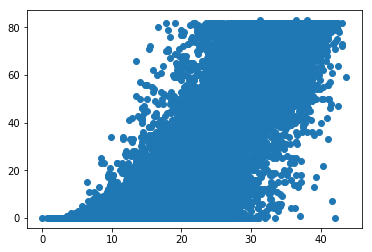

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

A = df2.dropna(subset=['GS', 'MP'])

plt.scatter(A['MP'], A['GS']);

In [92]:
A = A.drop(['Player', 'Tm', 'Target'], axis=1)

X_train = A.drop('GS', axis=1)
y_train = A['GS']

In [94]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(random_state=100)
)

param_distributions={
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'],
    'randomforestregressor__n_estimators': randint(50, 500),
    'randomforestregressor__max_depth': [5, 10, 15, 20, None],
    'randomforestregressor__max_features': uniform(0, 1),
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:  2.4min remaining:   19.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished


In [96]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation accuracy', -search.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': 0.9321890875369226, 'randomforestregressor__n_estimators': 354, 'simpleimputer__strategy': 'most_frequent'}
Cross-validation accuracy 151.6081033763013


In [100]:
from sklearn.metrics import mean_squared_error

baseline = [np.mean(A['GS'])] * len(y_train)
baseline_mse = mean_squared_error(baseline, y_train)

print('Baseline mean squared error:', baseline_mse)
print('The model beats the baseline by:', baseline_mse - (-search.best_score_))

Baseline mean squared error: 923.9221927638953
The model beats the baseline by: 772.314089387594


In [101]:
B = df2[pd.isna(df2['GS']) == True]
B.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target
44,Aaron James,1975.0,NBA,SF,22.0,NOJ,76.0,NaN,22.8,4.9,10.2,0.477,0.0,0.0,0.0,4.9,10.2,0.477,0.477,1.9,2.5,0.778,1.8,3.0,4.8,0.5,0.2,NaN,2.9,11.7,0.9,0.8
45,Aaron James,1976.0,NBA,SF,23.0,NOJ,75.0,NaN,17.9,3.5,7.9,0.441,0.0,0.0,0.0,3.5,7.9,0.441,0.441,2.0,2.7,0.750,1.2,2.1,3.3,0.4,0.1,NaN,2.3,9.0,0.8,1.1
46,Aaron James,1977.0,NBA,SF,24.0,NOJ,52.0,NaN,20.4,4.6,9.3,0.490,0.0,0.0,0.0,4.6,9.3,0.490,0.490,1.7,2.2,0.781,1.1,2.5,3.6,0.4,0.1,NaN,2.4,10.9,1.1,1.4
47,Aaron James,1978.0,NBA,SF,25.0,NOJ,80.0,NaN,26.5,5.4,10.8,0.497,0.0,0.0,0.0,5.4,10.8,0.497,0.497,1.5,2.0,0.745,2.0,3.2,5.3,0.5,0.3,1.6,3.2,12.2,1.4,1.1
74,Abdul Jeelani,1980.0,NBA,SF,25.0,POR,77.0,NaN,16.7,3.7,7.3,0.510,0.0,0.1,0.0,3.7,7.3,0.515,0.510,2.1,2.6,0.789,1.5,2.0,3.5,0.5,0.5,1.5,2.0,9.6,1.2,1.0


In [102]:
pipeline=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='most_frequent'),
    RandomForestRegressor(max_depth=10, max_features=0.932, n_estimators=354, random_state=50)
)

pipeline.fit(X_train, y_train)

X_pred = B.drop(['Player', 'Tm', 'Target', 'GS'], axis=1)

y_pred = np.around(pipeline.predict(X_pred))

B['GS'] = y_pred

B.head()

C:\Anaconda3\envs\unit2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target
44,Aaron James,1975.0,NBA,SF,22.0,NOJ,76.0,27.0,22.8,4.9,10.2,0.477,0.0,0.0,0.0,4.9,10.2,0.477,0.477,1.9,2.5,0.778,1.8,3.0,4.8,0.5,0.2,NaN,2.9,11.7,0.9,0.8
45,Aaron James,1976.0,NBA,SF,23.0,NOJ,75.0,10.0,17.9,3.5,7.9,0.441,0.0,0.0,0.0,3.5,7.9,0.441,0.441,2.0,2.7,0.750,1.2,2.1,3.3,0.4,0.1,NaN,2.3,9.0,0.8,1.1
46,Aaron James,1977.0,NBA,SF,24.0,NOJ,52.0,14.0,20.4,4.6,9.3,0.490,0.0,0.0,0.0,4.6,9.3,0.490,0.490,1.7,2.2,0.781,1.1,2.5,3.6,0.4,0.1,NaN,2.4,10.9,1.1,1.4
47,Aaron James,1978.0,NBA,SF,25.0,NOJ,80.0,50.0,26.5,5.4,10.8,0.497,0.0,0.0,0.0,5.4,10.8,0.497,0.497,1.5,2.0,0.745,2.0,3.2,5.3,0.5,0.3,1.6,3.2,12.2,1.4,1.1
74,Abdul Jeelani,1980.0,NBA,SF,25.0,POR,77.0,8.0,16.7,3.7,7.3,0.510,0.0,0.1,0.0,3.7,7.3,0.515,0.510,2.1,2.6,0.789,1.5,2.0,3.5,0.5,0.5,1.5,2.0,9.6,1.2,1.0


In [104]:
new_gs = []

for i in range(len(df2)):
    if (i in B.index) == False:
        new_gs.append(df2.loc[i, 'GS'])
    else:
        new_gs.append(B.loc[i, 'GS'])
        
assert new_gs[0] == df2.loc[0, 'GS']

In [105]:
assert new_gs[44] == B.loc[44, 'GS']

In [106]:
df2['GS'] = new_gs

df2.isnull().sum()

Player       0
Year         0
Lge          0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP         452
FG           0
FGA          0
FG%          0
3P           0
3PA          0
3P%          0
2P           0
2PA          0
2P%          0
eFG%         0
FT           0
FTA          0
FT%          0
ORB       2831
DRB       2831
TRB        369
STL       3339
BLK       3338
TOV       3553
PF           0
PTS          0
AST          0
Target       0
dtype: int64

In [107]:
CAS = []

for i in range(len(df2)):
    career_assists = []
    for j in range(25):
        if i-j < 0:
            continue
        elif df2.loc[i, 'Player'] != df2.loc[i-j, 'Player']:
            continue
        else:
            career_assists.append(df2.loc[i-j, 'AST'])
    CAS.append(np.mean(career_assists))
    
Season = []

for i in range(len(df2)):
    if i==0:
        Season.append(1)
    elif df2.loc[i, 'Player'] == df2.loc[i-1, 'Player']:
        Season.append(Season[i-1] + 1)
    else:
        Season.append(1)
        
df2['CAS'] = CAS
df2['Szn'] = Season

df2.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn
0,A.C. Green,1986.0,NBA,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1,0.700000,1
1,A.C. Green,1987.0,NBA,PF,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,1.1,0.900000,2
2,A.C. Green,1988.0,NBA,PF,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3,0.966667,3
3,A.C. Green,1989.0,NBA,PF,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.1,1.050000,4
4,A.C. Green,1990.0,NBA,PF,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9,1.060000,5


In [109]:
imputer = SimpleImputer(strategy='most_frequent')

df3 = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)

df3.isnull().sum()

Player    0
Year      0
Lge       0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
AST       0
Target    0
CAS       0
Szn       0
dtype: int64

In [52]:
val = df2[df2['Year'] >= 2015]
train = df2[df2['Year'] < 2015]

val = val.reset_index(drop=True)
train = train.reset_index(drop=True)

train.to_csv('train-04.csv', index=None, header=True)
val.to_csv('val-04.csv', index=None, header=True)

In [53]:
stats_page = requests.get('https://www.basketball-reference.com/teams/TOR/2019.html')
content = stats_page.content
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table', attrs={'id': 'roster'})

table_str = str(table)
df10 = pd.read_html(table_str)[0]

df10.head()

,No.,Player,Pos,Ht,Wt,Birth Date,Unnamed: 6,Exp,College
0,3,OG Anunoby,SF,6-8,232,"July 17, 1997",gb,1,Indiana
1,25,Chris Boucher,PF,6-10,200,"January 11, 1993",lc,1,Oregon
2,4,Lorenzo Brown,PG,6-5,189,"August 26, 1990",us,4,NC State
3,33,Marc Gasol,C,7-1,255,"January 29, 1985",es,10,NaN
4,14,Danny Green,SG,6-6,215,"June 22, 1987",us,9,UNC


In [54]:
stats_page = requests.get('https://www.basketball-reference.com/teams/PHI/2019.html')
content = stats_page.content
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table', attrs={'id': 'roster'})

table_str = str(table)
df11 = pd.read_html(table_str)[0]

df11.head()

,No.,Player,Pos,Ht,Wt,Birth Date,Unnamed: 6,Exp,College
0,43,Jonah Bolden,PF,6-10,220,"January 2, 1996",au,R,UCLA
1,0,Corey Brewer,SF,6-9,186,"March 5, 1986",us,11,Florida
2,23,Jimmy Butler,SF,6-8,232,"September 14, 1989",us,7,Marquette
3,22,Wilson Chandler,PF,6-9,225,"May 10, 1987",us,10,DePaul
4,33,Robert Covington,SF,6-9,225,"December 14, 1990",us,5,Tennessee State


In [55]:
pd.DataFrame(df10['Player']).rename(columns={'Player': 'TOR 2019'})

,TOR 2019
0,OG Anunoby
1,Chris Boucher
2,Lorenzo Brown
3,Marc Gasol
4,Danny Green
5,Serge Ibaka
6,Kawhi Leonard
7,Jeremy Lin
8,Kyle Lowry
9,Jordan Loyd


In [56]:
temp1 = pd.DataFrame(df10['Player']).rename(columns={'Player': 'TOR 2019'})
temp2 = pd.DataFrame(df11['Player']).rename(columns={'Player': 'PHI 2019'})

df3 = pd.concat([temp1, temp2], axis=1)
df3.head()

,TOR 2019,PHI 2019
0,OG Anunoby,Jonah Bolden
1,Chris Boucher,Corey Brewer
2,Lorenzo Brown,Jimmy Butler
3,Marc Gasol,Wilson Chandler
4,Danny Green,Robert Covington


In [57]:
df['Tm'].value_counts()

NYK    1016
BOS     989
DET     866
LAL     813
PHI     803
       ... 
MMS      12
WSA      12
MNM      11
DNA      11
AND      11
Name: Tm, Length: 103, dtype: int64

In [110]:
teams = df['Tm'].value_counts().index
teams

Index(['NYK', 'BOS', 'DET', 'LAL', 'PHI', 'ATL', 'CHI', 'MIL', 'CLE', 'PHO',
       ...
       'MNP', 'CAP', 'TEX', 'CHP', 'NJA', 'WSA', 'MMS', 'AND', 'MNM', 'DNA'],
      dtype='object', length=103)

In [59]:
tm = 'NYK'
yr = 2010
url = f'https://www.basketball-reference.com/teams/{tm}/{yr}.html'
url

'https://www.basketball-reference.com/teams/NYK/2010.html'

In [60]:
team = 'NYK'
df3 = pd.DataFrame()
years = []

for i in range(len(df)):
    if df.loc[i, 'Tm'] != team:
        continue
    else:
        years.append(int(df.loc[i, 'Year']))

years = list(set(years))

for year in years:
    url = f'https://www.basketball-reference.com/teams/{team}/{year}.html'
    stats_page = requests.get(url)
    content = stats_page.content
    soup = BeautifulSoup(content, 'html.parser')
    table = soup.find(name='table', attrs={'id': 'roster'})
    temp1 = pd.read_html(str(table))[0]
    temp2 = pd.DataFrame(temp1['Player']).rename(columns={'Player': f'{team} {year}'})
        
    df3 = pd.concat([df3, temp2], axis=1)

df3.head()

,NYK 1947,NYK 1948,NYK 1949,NYK 1950,NYK 1951,NYK 1952,NYK 1953,NYK 1954,NYK 1955,NYK 1956,NYK 1957,NYK 1958,NYK 1959,NYK 1960,NYK 1961,NYK 1962,NYK 1963,NYK 1964,NYK 1965,NYK 1966,NYK 1967,NYK 1968,NYK 1969,NYK 1970,NYK 1971,NYK 1972,NYK 1973,NYK 1974,NYK 1975,NYK 1976,NYK 1977,NYK 1978,NYK 1979,NYK 1980,NYK 1981,NYK 1982,NYK 1983,NYK 1984,NYK 1985,NYK 1986,NYK 1987,NYK 1988,NYK 1989,NYK 1990,NYK 1991,NYK 1992,NYK 1993,NYK 1994,NYK 1995,NYK 1996,NYK 1997,NYK 1998,NYK 1999,NYK 2000,NYK 2001,NYK 2002,NYK 2003,NYK 2004,NYK 2005,NYK 2006,NYK 2007,NYK 2008,NYK 2009,NYK 2010,NYK 2011,NYK 2012,NYK 2013,NYK 2014,NYK 2015,NYK 2016,NYK 2017,NYK 2018,NYK 2019
0,Aud Brindley,Carl Braun,Carl Braun,Ed Bartels,Vince Boryla,Vince Boryla,Vince Boryla,Don Ackerman,Don Anielak,Dick Atha,Jim Baechtold,Carl Braun,Jerry Bird,Bob Anderegg,Whitey Bell,George Blaney,Cleveland Buckner,Bob Boozer,Jim Barnes,Jim Barnes,Henry Akin,Dick Barnett,Dick Barnett,Dick Barnett,Dick Barnett,Dick Barnett,Dick Barnett,Dick Barnett,Jim Barnett,Jim Barnett,Butch Beard,Butch Beard,Tom Barker,Bill Cartwright,Reggie Carter,Alex Bradley,Bill Cartwright,Bill Cartwright,James Bailey,James Bailey,Bill Cartwright,Rick Carlisle,Greg Butler,Greg Butler,Maurice Cheeks,Greg Anthony,Eric Anderson,Eric Anderson,Greg Anthony,Willie Anderson,Scott Brooks,Anthony Bowie,Rick Brunson,Etdrick Bohannon,Rick Brunson,Shandon Anderson,Shandon Anderson,Shandon Anderson,Shandon Anderson,Trevor Ariza,Renaldo Balkman,Renaldo Balkman,Wilson Chandler,Earl Barron,Carmelo Anthony,Carmelo Anthony,Carmelo Anthony,Cole Aldrich,Quincy Acy,Arron Afflalo,Carmelo Anthony,Ron Baker,Kadeem Allen
1,Tommy Byrnes,Tommy Byrnes,Tommy Byrnes,Vince Boryla,Nat Clifton,Nat Clifton,Carl Braun,Jim Baechtold,Jim Baechtold,Jim Baechtold,Gary Bergen,Ray Felix,Carl Braun,Whitey Bell,Carl Braun,Cleveland Buckner,Dave Budd,Dave Budd,Bob Boozer,Dick Barnett,Dick Barnett,Walt Bellamy,Walt Bellamy,Nate Bowman,Bill Bradley,Bill Bradley,Henry Bibby,Dennis Bell,Dennis Bell,Butch Beard,Bill Bradley,Ticky Burden,Butch Beard,Jim Cleamons,Bill Cartwright,Reggie Carter,Mike Davis,Len Elmore,Ken Bannister,Ken Bannister,Pat Cummings,Bill Cartwright,Patrick Ewing,Maurice Cheeks,Patrick Ewing,James Donaldson,Greg Anthony,Greg Anthony,Anthony Bonner,Doug Christie,Chris Childs,Chris Childs,Marcus Camby,Rick Brunson,Marcus Camby,Marcus Camby,Michael Doleac,Vin Baker,Trevor Ariza,Matt Barnes,Kelvin Cato,Wilson Chandler,Mardy Collins,Jonathan Bender,Renaldo Balkman,Renaldo Balkman,Earl Barron,Carmelo Anthony,Cole Aldrich,Lou Amundson,Ron Baker,Michael Beasley,Ron Baker
2,Bob Cluggish,Leo Gottlieb,Joe Colone,Carl Braun,Ray Ellefson,Harry Gallatin,Dick Bunt,Vince Boryla,Carl Braun,Carl Braun,Carl Braun,Larry Friend,Pete Brennan,Carl Braun,Dave Budd,Dave Budd,Donnie Butcher,Donnie Butcher,Em Bryant,Walt Bellamy,Walt Bellamy,Nate Bowman,Nate Bowman,Bill Bradley,Dave DeBusschere,Dave DeBusschere,Bill Bradley,Henry Bibby,Henry Bibby,Dennis Bell,Ticky Burden,Jim Cleamons,Ron Behagen,Hollis Copeland,Larry Demic,Bill Cartwright,Ernie Grunfeld,Eric Fernsten,Butch Carter,Butch Carter,Patrick Ewing,Pat Cummings,Sidney Green,Patrick Ewing,Greg Grant,Patrick Eddie,Rolando Blackman,Rolando Blackman,Doug Christie,Hubert Davis,Patrick Ewing,Terry Cummings,Chris Childs,Marcus Camby,Chris Childs,Howard Eisley,Howard Eisley,Michael Doleac,Vin Baker,Jackie Butler,Mardy Collins,Mardy Collins,Jamal Crawford,Wilson Chandler,Chauncey Billups,Mike Bibby,Ronnie Brewer,Andrea Bargnani,Lou Amundson,Thanasis Antetokounmpo,Willy Hernangómez,Trey Burke,Trey Burke
3,Bob Fitzgerald,Sonny Hertzberg,Harry Gallatin,Harry Donovan,Harry Gallatin,George Kaftan,Nat Clifton,Carl Braun,Fred Christ,Nat Clifton,Nat Clifton,Richie Guerin,Mike Farmer,Mike Farmer,Mike Farmer,Ed Burton,Al Butler,Al Butler,Dave Budd,Em Bryant,Em Bryant,Bill Bradley,Bill Bradley,Dave DeBusschere,Greg Fillmore,Greg Fillmore,Dave DeBusschere,Bill Bradley,Bill Bradley,Bill Bradley,Mel Davis,Glen Gondrezick,Greg B

In [61]:
df3 = pd.DataFrame()

for team in teams:
    years = []
    for i in range(len(df)):
        if df.loc[i, 'Tm'] != team:
            continue
        else:
            years.append(int(df.loc[i, 'Year']))
    years = list(set(years))
    for year in years:
        url = f'https://www.basketball-reference.com/teams/{team}/{year}.html'
        stats_page = requests.get(url)
        content = stats_page.content
        soup = BeautifulSoup(content, 'html.parser')
        table = soup.find(name='table', attrs={'id': 'roster'})
        try:
            temp1 = pd.read_html(str(table))[0]
        except:
            print(f'The error is due to {team} in year {year}')
        #temp2 = pd.DataFrame(temp1['Player']).rename(columns={'Player': f'{team} {year}'})
        
        #df3 = pd.concat([df3, temp2], axis=1)
            
#df3.head()

In [111]:
df4 = pd.DataFrame()

for team in teams:
    years = []
    for i in range(len(df)):
        if df.loc[i, 'Tm'] != team:
            continue
        else:
            years.append(int(df.loc[i, 'Year']))
    years = list(set(years))
    for year in years:
        url = f'https://www.basketball-reference.com/teams/{team}/{year}.html'
        stats_page = requests.get(url)
        content = stats_page.content
        soup = BeautifulSoup(content, 'html.parser')
        table = soup.find(name='table', attrs={'id': 'roster'})
        temp1 = pd.read_html(str(table))[0]
        temp2 = pd.DataFrame(temp1['Player']).rename(columns={'Player': f'{team} {year}'})
        
        df4 = pd.concat([df4, temp2], axis=1)
            
df4.head()

,NYK 1947,NYK 1948,NYK 1949,NYK 1950,NYK 1951,NYK 1952,NYK 1953,NYK 1954,NYK 1955,NYK 1956,NYK 1957,NYK 1958,NYK 1959,NYK 1960,NYK 1961,NYK 1962,NYK 1963,NYK 1964,NYK 1965,NYK 1966,NYK 1967,NYK 1968,NYK 1969,NYK 1970,NYK 1971,NYK 1972,NYK 1973,NYK 1974,NYK 1975,NYK 1976,NYK 1977,NYK 1978,NYK 1979,NYK 1980,NYK 1981,NYK 1982,NYK 1983,NYK 1984,NYK 1985,NYK 1986,NYK 1987,NYK 1988,NYK 1989,NYK 1990,NYK 1991,NYK 1992,NYK 1993,NYK 1994,NYK 1995,NYK 1996,NYK 1997,NYK 1998,NYK 1999,NYK 2000,NYK 2001,NYK 2002,NYK 2003,NYK 2004,NYK 2005,NYK 2006,NYK 2007,NYK 2008,NYK 2009,NYK 2010,NYK 2011,NYK 2012,NYK 2013,NYK 2014,NYK 2015,NYK 2016,NYK 2017,NYK 2018,NYK 2019,BOS 1947,BOS 1948,BOS 1949,BOS 1950,BOS 1951,BOS 1952,BOS 1953,BOS 1954,BOS 1955,BOS 1956,BOS 1957,BOS 1958,BOS 1959,BOS 1960,BOS 1961,BOS 1962,BOS 1963,BOS 1964,BOS 1965,BOS 1966,BOS 1967,BOS 1968,BOS 1969,BOS 1970,BOS 1971,BOS 1972,BOS 1973,BOS 1974,BOS 1975,BOS 1976,BOS 1977,BOS 1978,BOS 1979,BOS 1980,BOS 1981,BOS 1982,BOS 1983,BOS 1984,BOS 1985,BOS 1986,BOS 1987,BOS 1988,BOS 1989,BOS 1990,BOS 1991,BOS 1992,BOS 1993,BOS 1994,BOS 1995,BOS 1996,BOS 1997,BOS 1998,BOS 1999,BOS 2000,BOS 2001,BOS 2002,BOS 2003,BOS 2004,BOS 2005,BOS 2006,BOS 2007,BOS 2008,BOS 2009,BOS 2010,BOS 2011,BOS 2012,BOS 2013,BOS 2014,BOS 2015,BOS 2016,BOS 2017,BOS 2018,BOS 2019,DET 1958,DET 1959,DET 1960,DET 1961,DET 1962,DET 1963,DET 1964,DET 1965,DET 1966,DET 1967,DET 1968,DET 1969,DET 1970,DET 1971,DET 1972,DET 1973,DET 1974,DET 1975,DET 1976,DET 1977,DET 1978,DET 1979,DET 1980,DET 1981,DET 1982,DET 1983,DET 1984,DET 1985,DET 1986,DET 1987,DET 1988,DET 1989,DET 1990,DET 1991,DET 1992,DET 1993,DET 1994,DET 1995,DET 1996,DET 1997,DET 1998,DET 1999,DET 2000,DET 2001,DET 2002,DET 2003,DET 2004,DET 2005,DET 2006,DET 2007,DET 2008,DET 2009,DET 2010,DET 2011,DET 2012,DET 2013,DET 2014,DET 2015,DET 2016,DET 2017,DET 2018,DET 2019,LAL 1961,LAL 1962,LAL 1963,LAL 1964,LAL 1965,LAL 1966,LAL 1967,LAL 1968,LAL 1969,LAL 1970,LAL 1971,LAL 1972,LAL 1973,LAL 1974,LAL 1975,LAL 1976,LAL 1977,LAL 1978,LAL 1979,LAL 1980,LAL 1981,LAL 1982,LAL 1983,LAL 1984,LAL 1985,LAL 1986,LAL 1987,LAL 1988,LAL 1989,LAL 1990,LAL 1991,LAL 1992,LAL 1993,LAL 1994,LAL 1995,LAL 1996,LAL 1997,LAL 1998,LAL 1999,LAL 2000,LAL 2001,LAL 2002,...,MNL 1954,MNL 1955,MNL 1956,MNL 1957,MNL 1958,MNL 1959,MNL 1960,MNL 1949,MNL 1950,MNL 1951,NOH 2003,NOH 2004,NOH 2005,NOH 2008,NOH 2009,NOH 2010,NOH 2011,NOH 2012,NOH 2013,KCK 1984,KCK 1985,KCK 1976,KCK 1977,KCK 1978,KCK 1979,KCK 1980,KCK 1981,KCK 1982,KCK 1983,BAL 1964,BAL 1965,BAL 1966,BAL 1967,BAL 1968,BAL 1969,BAL 1970,BAL 1971,BAL 1972,BAL 1973,BRK 2016,BRK 2017,BRK 2018,BRK 2019,BRK 2013,BRK 2014,BRK 2015,SFW 1963,SFW 1964,SFW 1965,SFW 1966,SFW 1967,SFW 1968,SFW 1969,SFW 1970,SFW 1971,NOP 2016,NOP 2017,NOP 2018,NOP 2019,NOP 2014,NOP 2015,BLB 1952,BLB 1953,BLB 1954,BLB 1955,BLB 1948,BLB 1949,BLB 1950,BLB 1951,KEN 1968,KEN 1969,KEN 1970,KEN 1971,KEN 1972,KEN 1973,KEN 1974,KEN 1975,FTW 1952,FTW 1953,FTW 1954,FTW 1955,FTW 1956,FTW 1957,FTW 1949,FTW 1950,FTW 1951,BUF 1971,BUF 1972,BUF 1973,BUF 1974,BUF 1975,BUF 1976,BUF 1977,BUF 1978,INA 1968,INA 1969,INA 1970,INA 1971,INA 1972,INA 1973,INA 1974,INA 1975,ROC 1952,ROC 1953,ROC 1954,ROC 1955,ROC 1956,ROC 1957,ROC 1949,ROC 1950,ROC 1951,NYA 1969,NYA 1970,NYA 1971,NYA 1972,NYA 1973,NYA 1974,NYA 1975,VAN 1996,VAN 1997,VAN 1998,VAN 1999,VAN 2000,VAN 2001,SDC 1984,SDC 1979,SDC 1980,SDC 1981,SDC 1982,SDC 1983,DNR 1968,DNR 1969,DNR 1970,DNR 1971,DNR 1972,DNR 1973,DNR 1974,CHO 2016,CHO 2017,CHO 2018,CHO 2019,CHO 2015,DLC 1968,DLC 1969,DLC 1970,DLC 1972,DLC 1973,VIR 1971,VIR 1972,VIR 1973,VIR 1974,VIR 1975,NOJ 1975,NOJ 1976,NOJ 1977,NOJ 1978,NOJ 1979,CAR 1970,CAR 1971,CAR 1972,CAR 1973,CAR 1974,MLH 1952,MLH 1953,MLH 1954,MLH 1955,UTS 1971,UTS 1972,UTS 1973,UTS 1974,UTS 1975,WSC 1947,WSC 1948,WSC 1949,WSC 1950,WSC 1951,SDR 1968,SDR 1969,SDR 1970,SDR 1971,STB 1947,STB 1948,STB 1949,STB 1950,CHS 1947,CHS 1948,CHS 1949,CHS 1950,INO 1952,INO 1953,INO 1950,INO 1951,PRO 1947,PRO 1948

In [73]:
'*' in df5.loc[i, 'Player']

False

In [74]:
a = 'Al Attles*'.split('*')
a[0]

'Al Attles'

In [115]:
df5 = df3.copy()
player_new = []

for i in range(len(df5)):
    if '*' in df5.loc[i, 'Player']:
        a = df5.loc[i, 'Player'].split('*')
        player_new.append(a[0])
    else:
        player_new.append(df5.loc[i, 'Player'])
        
df5['Player'] = player_new

In [2]:
df6.to_csv('assists-data-03.csv', index=None, header=True)

NameError: name 'df6' is not defined

In [76]:
df6 = pd.read_csv('assists-data-02.csv')

In [77]:
df6.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target
0,A.C. Green,1986.0,NBA,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1
1,A.C. Green,1987.0,NBA,PF,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,1.1
2,A.C. Green,1988.0,NBA,PF,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3
3,A.C. Green,1989.0,NBA,PF,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.1
4,A.C. Green,1990.0,NBA,PF,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9


In [116]:
stats = ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
         'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'AST', 'CAS']

for stat in stats:
    df5[f'{stat}_adj'] = df5[stat] * df5['MP']
    
df5.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn,FG_adj,FGA_adj,FG%_adj,3P_adj,3PA_adj,3P%_adj,2P_adj,2PA_adj,2P%_adj,eFG%_adj,FT_adj,FTA_adj,FT%_adj,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj,CAS_adj
0,A.C. Green,1986,NBA,PF,22,LAL,82,1,18.8,2.5,4.7,0.539,0,0.1,0.167,2.5,4.7,0.545,0.54,1.2,2,0.611,2,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1,0.7,1,47,88.36,10.1332,0,1.88,3.1396,47,88.36,10.246,10.152,22.56,37.6,11.4868,37.6,50.76,86.48,11.28,11.28,22.56,52.64,120.32,13.16,13.16
1,A.C. Green,1987,NBA,PF,23,LAL,79,72,28.4,4,7.4,0.538,0,0.1,0,4,7.4,0.543,0.538,2.8,3.6,0.78,2.7,5.1,7.8,0.9,1,1.3,2.2,10.8,1.1,1.1,0.9,2,113.6,210.16,15.2792,0,2.84,0,113.6,210.16,15.4212,15.2792,79.52,102.24,22.152,76.68,144.84,221.52,25.56,28.4,36.92,62.48,306.72,31.24,25.56
2,A.C. Green,1988,NBA,PF,24,LAL,82,64,32.1,3.9,7.8,0.503,0,0,0,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3,0.966667,3,125.19,250.38,16.1463,0,0,0,125.19,250.38,16.2105,16.1463,115.56,147.66,24.8133,96.3,182.97,279.27,35.31,16.05,48.15,80.25,365.94,35.31,31.03
3,A.C. Green,1989,NBA,PF,25,LAL,82,82,30.6,4.9,9.2,0.529,0,0.2,0.235,4.8,9,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9,1.1,0.7,1.5,2.1,13.3,1.3,1.1,1.05,4,149.94,281.52,16.1874,0,6.12,7.191,146.88,275.4,16.4016,16.2792,104.04,134.64,24.0516,94.86,180.54,275.4,33.66,21.42,45.9,64.26,406.98,39.78,32.13
4,A.C. Green,1990,NBA,PF,26,LAL,82,82,33,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9,1.06,5,155.1,323.4,15.774,6.6,19.8,9.339,148.5,306.9,16.137,16.038,112.2,148.5,24.783,105.6,181.5,287.1,26.4,19.8,46.2,82.5,425.7,36.3,34.98


In [117]:
df5.isnull().sum()

Player      0
Year        0
Lge         0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
FG          0
FGA         0
FG%         0
3P          0
3PA         0
3P%         0
2P          0
2PA         0
2P%         0
eFG%        0
FT          0
FTA         0
FT%         0
ORB         0
DRB         0
TRB         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
AST         0
Target      0
CAS         0
Szn         0
FG_adj      0
FGA_adj     0
FG%_adj     0
3P_adj      0
3PA_adj     0
3P%_adj     0
2P_adj      0
2PA_adj     0
2P%_adj     0
eFG%_adj    0
FT_adj      0
FTA_adj     0
FT%_adj     0
ORB_adj     0
DRB_adj     0
TRB_adj     0
STL_adj     0
BLK_adj     0
TOV_adj     0
PF_adj      0
PTS_adj     0
AST_adj     0
CAS_adj     0
dtype: int64

In [77]:
names = [f'Teammate {i+1}' for i in range(28)]
teammates = []

for i in range(len(df6)):
    for name in names:
        if (df6.loc[1, name] == df6.loc[i, 'Player']) & (df6.loc[i, 'Year'] == 1986):
            teammates.append(i)
            
teammates_df = df6.loc[teammates]
teammates_df

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn,Teammate 1,Teammate 2,Teammate 3,Teammate 4,Teammate 5,Teammate 6,Teammate 7,Teammate 8,Teammate 9,Teammate 10,Teammate 11,Teammate 12,Teammate 13,Teammate 14,Teammate 15,Teammate 16,Teammate 17,Teammate 18,Teammate 19,Teammate 20,Teammate 21,Teammate 22,Teammate 23,Teammate 24,Teammate 25,Teammate 26,Teammate 27,Teammate 28,FG_adj,FGA_adj,FG%_adj,3P_adj,3PA_adj,3P%_adj,2P_adj,2PA_adj,2P%_adj,eFG%_adj,FT_adj,FTA_adj,FT%_adj,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj
2458,Byron Scott,1986.0,NBA,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,0.3,0.8,0.361,6.4,12.2,0.523,0.524,1.8,2.3,0.784,0.7,1.8,2.5,1.1,0.2,1.4,2.2,15.4,2.2,3.4,2.533333,3,Kareem Abdul-Jabbar,Michael Cooper,A.C. Green,Pétur Guðmundsson,Jerome Henderson,Magic Johnson,Mitch Kupchak,Ronnie Lester,Maurice Lucas,Mike McGee,Chuck Nevitt,Kurt Rambis,NaN,Larry Spriggs,James Worthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.96,374.40,14.7744,8.64,23.04,10.3968,184.32,351.36,15.0624,15.0912,51.84,66.24,22.5792,20.16,51.84,72.00,31.68,5.76,40.32,63.36,443.52,63.36
6200,Frank Brickowski,1986.0,NBA,C,26.0,SEA,40.0,2.0,7.8,0.8,1.5,0.517,0.0,0.0,0.000,0.8,1.5,0.517,0.517,0.5,0.7,0.667,0.4,1.0,1.4,0.3,0.2,0.6,1.9,2.0,0.5,0.4,0.900000,2,NaN,Tom Chambers,Gerald Henderson,Rod Higgins,George Johnson,Brian Martin,Tim McCormick,Xavier McDaniel,Michael Phelps,David Pope,Jack Sikma,Ricky Sobers,Alex Stivrins,Danny Vranes,Al Wood,Danny Young,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.24,11.70,4.0326,0.00,0.00,0.0000,6.24,11.70,4.0326,4.0326,3.90,5.46,5.2026,3.12,7.80,10.92,2.34,1.56,4.68,14.82,15.60,3.90
8038,James Worthy,1986.0,NBA,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,0.0,0.2,0.000,8.4,14.3,0.586,0.579,3.2,4.2,0.771,1.8,3.3,5.2,1.1,1.0,2.0,2.6,20.0,2.7,2.8,2.350000,4,Kareem Abdul-Jabbar,Michael Cooper,A.C. Green,Pétur Guðmundsson,Jerome Henderson,Magic Johnson,Mitch Kupchak,Ronnie Lester,Maurice Lucas,Mike McGee,Chuck Nevitt,Kurt Rambis,Byron Scott,Larry Spriggs,James Worthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.68,474.15,18.9333,0.00,6.54,0.0000,274.68,467.61,19.1622,18.9333,104.64,137.34,25.2117,58.86,107.91,170.04,35.97,32.70,65.40,85.02,654.00,88.29
10014,Kareem Abdul-Jabbar,1986.0,NBA,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,0.0,0.0,0.000,9.6,16.9,0.565,0.564,4.3,5.6,0.765,1.7,4.4,6.1,0.8,1.6,2.6,3.1,23.4,3.5,2.6,3.952941,17,Kareem Abdul-Jabbar,Michael Cooper,A.C. Green,Pétur Guðmundsson,Jerome Henderson,Magic Johnson,Mitch Kupchak,Ronnie Lester,Maurice Lucas,Mike McGee,Chuck Nevitt,Kurt Rambis,Byron Scott,Larry Spriggs,James Worthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.68,562.77,18.7812,0.00,0.00,0.0000,319.68,562.77,18.8145,18.7812,143.19,186.48,25.4745,56.61,146.52,203.13,26.64,53.28,86.58,103.23,779.22,116.55
10709,Kurt Rambis,1986.0,NBA,PF,27.0,LAL,74.0,74.0,21.3,2.2,3.6,0.595,0.0,0.0,0.000,2.2,3.6,0.595,0.595,1.2,1.6,0.721,2.1,4.9,7.0,0.9,0.4,1.3,2.7,5.5,0.9,0.8,0.900000,5,Kareem Abdul-Jabbar,Michael Cooper,A.C. Green,Pétur Guðmundsson,Jerome Henderson,Magic Johnson,Mitch Kupchak,Ronnie Lester,Maurice Lucas,Mike McGee,Chuck Nevitt,NaN,Byron Scott,Larry Spriggs,James Worthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.86,76.68,12.6735,0.00,0.00,0.0000,46.86,76.68,12.6735,12.6735,25.56,34.08,15.3573,44.73,104.37,149.10,19.17,8.52,27.69,57.51,117.15,19.17
11649,Magic Johnson,1986.0,NBA,PG,26.0,LAL,72.0,70.0,35.8,6.7,12.8,0.526,0.1,0.6,0.233,6.6,12.2,0.541,0.532,5.3,6.0,0.871,1.2,4.7,5.9,1.6,0.2,3.8,1.8,18.8,12.6,12.2,10.600000,7,Kareem Abdul-Jabbar,Michael Cooper,A.C. Green,Pétur Guðmundsson,Jerome Henderson,Magic Johnson,Mitch Kupchak,Ronnie Lester,Maurice Lucas,Mike McGee,Chuck Nevitt,Kurt Rambis,Byron Scott,Larry Spriggs,James Worthy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.86,458.24,18.8308,3.58,21.48,8.3414,236.28,436.76,19.3678,19.

In [79]:
stats

['FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'AST',
 'FG_adj',
 'FGA_adj',
 'FG%_adj',
 '3P_adj',
 '3PA_adj',
 '3P%_adj',
 '2P_adj',
 '2PA_adj',
 '2P%_adj',
 'eFG%_adj',
 'FT_adj',
 'FTA_adj',
 'FT%_adj',
 'ORB_adj',
 'DRB_adj',
 'TRB_adj',
 'STL_adj',
 'BLK_adj',
 'TOV_adj',
 'PF_adj',
 'PTS_adj',
 'AST_adj',
 'FG_adj_adj',
 'FGA_adj_adj',
 'FG%_adj_adj',
 '3P_adj_adj',
 '3PA_adj_adj',
 '3P%_adj_adj',
 '2P_adj_adj',
 '2PA_adj_adj',
 '2P%_adj_adj',
 'eFG%_adj_adj',
 'FT_adj_adj',
 'FTA_adj_adj',
 'FT%_adj_adj',
 'ORB_adj_adj',
 'DRB_adj_adj',
 'TRB_adj_adj',
 'STL_adj_adj',
 'BLK_adj_adj',
 'TOV_adj_adj',
 'PF_adj_adj',
 'PTS_adj_adj',
 'AST_adj_adj',
 'FG_adj_adj_adj',
 'FGA_adj_adj_adj',
 'FG%_adj_adj_adj',
 '3P_adj_adj_adj',
 '3PA_adj_adj_adj',
 '3P%_adj_adj_adj',
 '2P_adj_adj_adj',
 '2PA_adj_adj_adj',
 '2P%_adj_adj_adj',
 'eFG%_adj_adj_adj',
 'FT_adj_adj_adj',
 'F

In [118]:
stats2 = stats.copy()

for stat in stats:
    stats2.append(f'{stat}_adj')
    
stats2

['FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'AST',
 'CAS',
 'FG_adj',
 'FGA_adj',
 'FG%_adj',
 '3P_adj',
 '3PA_adj',
 '3P%_adj',
 '2P_adj',
 '2PA_adj',
 '2P%_adj',
 'eFG%_adj',
 'FT_adj',
 'FTA_adj',
 'FT%_adj',
 'ORB_adj',
 'DRB_adj',
 'TRB_adj',
 'STL_adj',
 'BLK_adj',
 'TOV_adj',
 'PF_adj',
 'PTS_adj',
 'AST_adj',
 'CAS_adj']

In [40]:
df7 = pd.read_csv('team-data.csv')

In [41]:
df7.head()

,Year,Tm,Player 1,Player 2,Player 3,Player 4,Player 5,Player 6,Player 7,Player 8,Player 9,Player 10,Player 11,Player 12,Player 13,Player 14,Player 15,Player 16,Player 17,Player 18,Player 19,Player 20,Player 21,Player 22,Player 23,Player 24,Player 25,Player 26,Player 27,Player 28
0,1947.0,BOS,Moe Becker,Al Brightman,Chuck Connors,Hal Crisler,Bob Duffy,Don Eliason,Warren Fenley,Jack Garfinkel,Wyndol Gray,Mel Hirsch,Charlie Hoefer,Tony Kappen,Jerry Kelly,Harold Kottman,Dick Murphy,Connie Simmons,Johnny Simmons,Art Spector,Virgil Vaughn,Red Wallace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1947.0,CHS,Norm Baker,Chet Carlisle,Don Carlson,Bill Davis,Bob Duffy,Chuck Gilmur,Chick Halbert,Tony Jaros,Wilbert Kautz,Garland O'Shields,Doyle Parrack,Bob Rensberger,Mickey Rottner,Jim Seminoff,Buck Sydnor,Max Zaslofsky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1947.0,CLR,Frankie Baumholtz,Leon Brown,Ken Corley,Ned Endress,Bob Faught,Kleggie Hermsen,Pete Lalich,Hank Lefkowitz,Leo Mogus,George Nostrand,Mel Riebe,Irv Rothenberg,Ed Sadowski,Kenny Sailors,Ben Scharnus,Dick Schulz,Nick Shaback,Ray Wertis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1947.0,DTF,Chet Aubuchon,Moe Becker,Harold Brown,Bob Dille,John Janisch,Harold Johnson,Tom King,Grady Lewis,Ariel Maughan,Howie McCarty,Stan Miasek,George Pearcy,Henry Pearcy,Milt Schoon,Art Stolkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1947.0,NYK,Aud Brindley,Tommy Byrnes,Bob Cluggish,Bob Fitzgerald,Frido Frey,Leo Gottlieb,Sonny Hertzberg,Ralph Kaplowitz,Lee Knorek,Frank Mangiapane,Nat Militzok,Bob Mullens,Dick Murphy,John Murphy,Bud Palmer,Hank Rosenstein,Ossie Schectman,Stan Stutz,Butch van Breda Kolff,Jake Weber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
team_0 = pd.DataFrame(df7.loc[0])
team_0

,0
Year,1947
Tm,BOS
Player 1,Moe Becker
Player 2,Al Brightman
Player 3,Chuck Connors
Player 4,Hal Crisler
Player 5,Bob Duffy
Player 6,Don Eliason
Player 7,Warren Fenley
Player 8,Jack Garfinkel


In [ ]:
for i in range(len(df7)):
    

In [13]:
names = [f'Teammate {i+1}' for i in range(28)]

from IPython.display import clear_output

import timeit

start = timeit.default_timer()

for i in range(len(df6)):
    clear_output(wait=True)
    teammates = []
    for j in range(len(df6)):
        for name in names:
            if (df6.loc[i, name] == df6.loc[j, 'Player']) & (df6.loc[j, 'Year'] == df6.loc[i, 'Year']-1):
                teammates.append(i)
            
    teammates_df = df6.loc[teammates]
    
    df6.loc[i, f'TM_eFG%_adj'] = np.mean(teammates_df['eFG%_adj'])
        
    stop = timeit.default_timer()
    
    if (i/len(df6)*100) < 5:
        expected_time = 'Calculating...'
        
    else:
        time_perc = timeit.default_timer()
        expected_time = np.round(((time_perc-start) / (i/len(df6))) / 60, 2)
        
    print('Current progress:', np.round(i/len(df6) * 100, 2), '%')
    print('Current run time:', np.round((stop - start) / 60, 2), 'minutes')
    print('Expected run time:', expected_time, 'minutes')
        
        
df6.head()

KeyboardInterrupt: 

In [19]:
df3.head()

,NYK 1947,NYK 1948,NYK 1949,NYK 1950,NYK 1951,NYK 1952,NYK 1953,NYK 1954,NYK 1955,NYK 1956,NYK 1957,NYK 1958,NYK 1959,NYK 1960,NYK 1961,NYK 1962,NYK 1963,NYK 1964,NYK 1965,NYK 1966,NYK 1967,NYK 1968,NYK 1969,NYK 1970,NYK 1971,NYK 1972,NYK 1973,NYK 1974,NYK 1975,NYK 1976,NYK 1977,NYK 1978,NYK 1979,NYK 1980,NYK 1981,NYK 1982,NYK 1983,NYK 1984,NYK 1985,NYK 1986,NYK 1987,NYK 1988,NYK 1989,NYK 1990,NYK 1991,NYK 1992,NYK 1993,NYK 1994,NYK 1995,NYK 1996,NYK 1997,NYK 1998,NYK 1999,NYK 2000,NYK 2001,NYK 2002,NYK 2003,NYK 2004,NYK 2005,NYK 2006,NYK 2007,NYK 2008,NYK 2009,NYK 2010,NYK 2011,NYK 2012,NYK 2013,NYK 2014,NYK 2015,NYK 2016,NYK 2017,NYK 2018,NYK 2019,BOS 1947,BOS 1948,BOS 1949,BOS 1950,BOS 1951,BOS 1952,BOS 1953,BOS 1954,BOS 1955,BOS 1956,BOS 1957,BOS 1958,BOS 1959,BOS 1960,BOS 1961,BOS 1962,BOS 1963,BOS 1964,BOS 1965,BOS 1966,BOS 1967,BOS 1968,BOS 1969,BOS 1970,BOS 1971,BOS 1972,BOS 1973,BOS 1974,BOS 1975,BOS 1976,BOS 1977,BOS 1978,BOS 1979,BOS 1980,BOS 1981,BOS 1982,BOS 1983,BOS 1984,BOS 1985,BOS 1986,BOS 1987,BOS 1988,BOS 1989,BOS 1990,BOS 1991,BOS 1992,BOS 1993,BOS 1994,BOS 1995,BOS 1996,BOS 1997,BOS 1998,BOS 1999,BOS 2000,BOS 2001,BOS 2002,BOS 2003,BOS 2004,BOS 2005,BOS 2006,BOS 2007,BOS 2008,BOS 2009,BOS 2010,BOS 2011,BOS 2012,BOS 2013,BOS 2014,BOS 2015,BOS 2016,BOS 2017,BOS 2018,BOS 2019,DET 1958,DET 1959,DET 1960,DET 1961,DET 1962,DET 1963,DET 1964,DET 1965,DET 1966,DET 1967,DET 1968,DET 1969,DET 1970,DET 1971,DET 1972,DET 1973,DET 1974,DET 1975,DET 1976,DET 1977,DET 1978,DET 1979,DET 1980,DET 1981,DET 1982,DET 1983,DET 1984,DET 1985,DET 1986,DET 1987,DET 1988,DET 1989,DET 1990,DET 1991,DET 1992,DET 1993,DET 1994,DET 1995,DET 1996,DET 1997,DET 1998,DET 1999,DET 2000,DET 2001,DET 2002,DET 2003,DET 2004,DET 2005,DET 2006,DET 2007,DET 2008,DET 2009,DET 2010,DET 2011,DET 2012,DET 2013,DET 2014,DET 2015,DET 2016,DET 2017,DET 2018,DET 2019,LAL 1961,LAL 1962,LAL 1963,LAL 1964,LAL 1965,LAL 1966,LAL 1967,LAL 1968,LAL 1969,LAL 1970,LAL 1971,LAL 1972,LAL 1973,LAL 1974,LAL 1975,LAL 1976,LAL 1977,LAL 1978,LAL 1979,LAL 1980,LAL 1981,LAL 1982,LAL 1983,LAL 1984,LAL 1985,LAL 1986,LAL 1987,LAL 1988,LAL 1989,LAL 1990,LAL 1991,LAL 1992,LAL 1993,LAL 1994,LAL 1995,LAL 1996,LAL 1997,LAL 1998,LAL 1999,LAL 2000,LAL 2001,LAL 2002,...,MNL 1954,MNL 1955,MNL 1956,MNL 1957,MNL 1958,MNL 1959,MNL 1960,MNL 1949,MNL 1950,MNL 1951,NOH 2003,NOH 2004,NOH 2005,NOH 2008,NOH 2009,NOH 2010,NOH 2011,NOH 2012,NOH 2013,KCK 1984,KCK 1985,KCK 1976,KCK 1977,KCK 1978,KCK 1979,KCK 1980,KCK 1981,KCK 1982,KCK 1983,BAL 1964,BAL 1965,BAL 1966,BAL 1967,BAL 1968,BAL 1969,BAL 1970,BAL 1971,BAL 1972,BAL 1973,BRK 2016,BRK 2017,BRK 2018,BRK 2019,BRK 2013,BRK 2014,BRK 2015,SFW 1963,SFW 1964,SFW 1965,SFW 1966,SFW 1967,SFW 1968,SFW 1969,SFW 1970,SFW 1971,NOP 2016,NOP 2017,NOP 2018,NOP 2019,NOP 2014,NOP 2015,BLB 1952,BLB 1953,BLB 1954,BLB 1955,BLB 1948,BLB 1949,BLB 1950,BLB 1951,KEN 1968,KEN 1969,KEN 1970,KEN 1971,KEN 1972,KEN 1973,KEN 1974,KEN 1975,FTW 1952,FTW 1953,FTW 1954,FTW 1955,FTW 1956,FTW 1957,FTW 1949,FTW 1950,FTW 1951,BUF 1971,BUF 1972,BUF 1973,BUF 1974,BUF 1975,BUF 1976,BUF 1977,BUF 1978,INA 1968,INA 1969,INA 1970,INA 1971,INA 1972,INA 1973,INA 1974,INA 1975,ROC 1952,ROC 1953,ROC 1954,ROC 1955,ROC 1956,ROC 1957,ROC 1949,ROC 1950,ROC 1951,NYA 1969,NYA 1970,NYA 1971,NYA 1972,NYA 1973,NYA 1974,NYA 1975,VAN 1996,VAN 1997,VAN 1998,VAN 1999,VAN 2000,VAN 2001,SDC 1984,SDC 1979,SDC 1980,SDC 1981,SDC 1982,SDC 1983,DNR 1968,DNR 1969,DNR 1970,DNR 1971,DNR 1972,DNR 1973,DNR 1974,CHO 2016,CHO 2017,CHO 2018,CHO 2019,CHO 2015,DLC 1968,DLC 1969,DLC 1970,DLC 1972,DLC 1973,VIR 1971,VIR 1972,VIR 1973,VIR 1974,VIR 1975,NOJ 1975,NOJ 1976,NOJ 1977,NOJ 1978,NOJ 1979,CAR 1970,CAR 1971,CAR 1972,CAR 1973,CAR 1974,MLH 1952,MLH 1953,MLH 1954,MLH 1955,UTS 1971,UTS 1972,UTS 1973,UTS 1974,UTS 1975,WSC 1947,WSC 1948,WSC 1949,WSC 1950,WSC 1951,SDR 1968,SDR 1969,SDR 1970,SDR 1971,STB 1947,STB 1948,STB 1949,STB 1950,CHS 1947,CHS 1948,CHS 1949,CHS 1950,INO 1952,INO 1953,INO 1950,INO 1951,PRO 1947,PRO 1948

In [20]:
df3.to_csv('team-data-02.https://www.basketball-reference.com/leagues/NBA_{}.htmlcsv', index=None, header=True)

In [22]:
df3.columns

Index(['NYK 1947', 'NYK 1948', 'NYK 1949', 'NYK 1950', 'NYK 1951', 'NYK 1952',
       'NYK 1953', 'NYK 1954', 'NYK 1955', 'NYK 1956',
       ...
       'MNP 1969', 'CAP 1974', 'TEX 1971', 'CHP 1962', 'NJA 1968', 'WSA 1970',
       'MMS 1975', 'AND 1950', 'MNM 1968', 'DNA 1975'],
      dtype='object', length=1599)

In [23]:
nyk_1948 = pd.DataFrame(df3['NYK 1948'])
nyk_1948.head()

,NYK 1948
0,Carl Braun
1,Tommy Byrnes
2,Leo Gottlieb
3,Sonny Hertzberg
4,Dick Holub


In [26]:
nyk_1948['Year'] = 1947.0
nyk_1948.head()

,NYK 1948,Year
0,Carl Braun,1947.0
1,Tommy Byrnes,1947.0
2,Leo Gottlieb,1947.0
3,Sonny Hertzberg,1947.0
4,Dick Holub,1947.0


In [27]:
nyk_1948.columns = ['Player', 'Year']
nyk_1948.head()

,Player,Year
0,Carl Braun,1947.0
1,Tommy Byrnes,1947.0
2,Leo Gottlieb,1947.0
3,Sonny Hertzberg,1947.0
4,Dick Holub,1947.0


In [28]:
nyk_1948_new = nyk_1948.merge(df6, on=['Player', 'Year'], how='left')
nyk_1948_new.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn,Teammate 1,Teammate 2,Teammate 3,Teammate 4,Teammate 5,Teammate 6,Teammate 7,Teammate 8,Teammate 9,Teammate 10,Teammate 11,Teammate 12,Teammate 13,Teammate 14,Teammate 15,Teammate 16,Teammate 17,Teammate 18,Teammate 19,Teammate 20,Teammate 21,Teammate 22,Teammate 23,Teammate 24,Teammate 25,Teammate 26,Teammate 27,Teammate 28,FG_adj,FGA_adj,FG%_adj,3P_adj,3PA_adj,3P%_adj,2P_adj,2PA_adj,2P%_adj,eFG%_adj,FT_adj,FTA_adj,FT%_adj,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj,TM_FG,TM_FGA,TM_FG%,TM_3P,TM_3PA,TM_3P%,TM_2P,TM_2PA,TM_2P%,TM_eFG%,TM_FT,TM_FTA,TM_FT%,TM_ORB,TM_DRB,TM_TRB,TM_STL,TM_BLK,TM_TOV,TM_PF,TM_PTS,TM_AST,TM_FG_adj,TM_FGA_adj,TM_FG%_adj,TM_3P_adj,TM_3PA_adj,TM_3P%_adj,TM_2P_adj,TM_2PA_adj,TM_2P%_adj,TM_eFG%_adj,TM_FT_adj,TM_FTA_adj,TM_FT%_adj,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj
0,Carl Braun,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tommy Byrnes,1947.0,BAA,F-G,23.0,NYK,60.0,NaN,NaN,2.9,9.7,0.300,0.0,0.0,0.0,2.9,9.7,0.300,0.300,1.7,2.7,0.644,NaN,NaN,NaN,NaN,NaN,NaN,1.5,7.6,0.6,0.4,0.6,1.0,Aud Brindley,NaN,Bob Cluggish,Bob Fitzgerald,Frido Frey,Leo Gottlieb,Sonny Hertzberg,Ralph Kaplowitz,Lee Knorek,Frank Mangiapane,Nat Militzok,Bob Mullens,Dick Murphy,John Murphy,Bud Palmer,Hank Rosenstein,Ossie Schectman,Stan Stutz,Butch van Breda Kolff,Jake Weber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Leo Gottlieb,1947.0,BAA,G,26.0,NYK,57.0,NaN,NaN,2.6,8.7,0.302,0.0,0.0,0.0,2.6,8.7,0.302,0.302,0.6,1.0,0.655,NaN,NaN,NaN,NaN,NaN,NaN,1.2,5.9,0.4,0.4,0.4,1.0,Aud Brindley,Tommy Byrnes,Bob Cluggish,Bob Fitzgerald,Frido Frey,NaN,Sonny Hertzberg,Ralph Kaplowitz,Lee Knorek,Frank Mangiapane,Nat Militzok,Bob Mullens,Dick Murphy,John Murphy,Bud Palmer,Hank Rosenstein,Ossie Schectman,Stan Stutz,Butch van Breda Kolff,Jake Weber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sonny Hertzberg,1947.0,BAA,G,24.0,NYK,59.0,NaN,NaN,3.4,11.8,0.289,0.0,0.0,0.0,3.4,11.8,0.289,0.289,1.9,2.5,0.758,NaN,NaN,NaN,NaN,NaN,NaN,1.8,8.7,0.6,0.6,0.6,1.0,Aud Brindley,Tommy Byrnes,Bob Cluggish,Bob Fitzgerald,Frido Frey,Leo Gottlieb,NaN,Ralph Kaplowitz,Lee Knorek,Frank Mangiapane,Nat Militzok,Bob Mullens,Dick Murphy,John Murphy,Bud Palmer,Hank Rosenstein,Ossie Schectman,Stan Stutz,Butch van Breda Kolff,Jake Weber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dick Holub,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [30]:
assert nyk_1948.shape[0] == nyk_1948_new.shape[0]

In [119]:
df4.head()

,NYK 1947,NYK 1948,NYK 1949,NYK 1950,NYK 1951,NYK 1952,NYK 1953,NYK 1954,NYK 1955,NYK 1956,NYK 1957,NYK 1958,NYK 1959,NYK 1960,NYK 1961,NYK 1962,NYK 1963,NYK 1964,NYK 1965,NYK 1966,NYK 1967,NYK 1968,NYK 1969,NYK 1970,NYK 1971,NYK 1972,NYK 1973,NYK 1974,NYK 1975,NYK 1976,NYK 1977,NYK 1978,NYK 1979,NYK 1980,NYK 1981,NYK 1982,NYK 1983,NYK 1984,NYK 1985,NYK 1986,NYK 1987,NYK 1988,NYK 1989,NYK 1990,NYK 1991,NYK 1992,NYK 1993,NYK 1994,NYK 1995,NYK 1996,NYK 1997,NYK 1998,NYK 1999,NYK 2000,NYK 2001,NYK 2002,NYK 2003,NYK 2004,NYK 2005,NYK 2006,NYK 2007,NYK 2008,NYK 2009,NYK 2010,NYK 2011,NYK 2012,NYK 2013,NYK 2014,NYK 2015,NYK 2016,NYK 2017,NYK 2018,NYK 2019,BOS 1947,BOS 1948,BOS 1949,BOS 1950,BOS 1951,BOS 1952,BOS 1953,BOS 1954,BOS 1955,BOS 1956,BOS 1957,BOS 1958,BOS 1959,BOS 1960,BOS 1961,BOS 1962,BOS 1963,BOS 1964,BOS 1965,BOS 1966,BOS 1967,BOS 1968,BOS 1969,BOS 1970,BOS 1971,BOS 1972,BOS 1973,BOS 1974,BOS 1975,BOS 1976,BOS 1977,BOS 1978,BOS 1979,BOS 1980,BOS 1981,BOS 1982,BOS 1983,BOS 1984,BOS 1985,BOS 1986,BOS 1987,BOS 1988,BOS 1989,BOS 1990,BOS 1991,BOS 1992,BOS 1993,BOS 1994,BOS 1995,BOS 1996,BOS 1997,BOS 1998,BOS 1999,BOS 2000,BOS 2001,BOS 2002,BOS 2003,BOS 2004,BOS 2005,BOS 2006,BOS 2007,BOS 2008,BOS 2009,BOS 2010,BOS 2011,BOS 2012,BOS 2013,BOS 2014,BOS 2015,BOS 2016,BOS 2017,BOS 2018,BOS 2019,DET 1958,DET 1959,DET 1960,DET 1961,DET 1962,DET 1963,DET 1964,DET 1965,DET 1966,DET 1967,DET 1968,DET 1969,DET 1970,DET 1971,DET 1972,DET 1973,DET 1974,DET 1975,DET 1976,DET 1977,DET 1978,DET 1979,DET 1980,DET 1981,DET 1982,DET 1983,DET 1984,DET 1985,DET 1986,DET 1987,DET 1988,DET 1989,DET 1990,DET 1991,DET 1992,DET 1993,DET 1994,DET 1995,DET 1996,DET 1997,DET 1998,DET 1999,DET 2000,DET 2001,DET 2002,DET 2003,DET 2004,DET 2005,DET 2006,DET 2007,DET 2008,DET 2009,DET 2010,DET 2011,DET 2012,DET 2013,DET 2014,DET 2015,DET 2016,DET 2017,DET 2018,DET 2019,LAL 1961,LAL 1962,LAL 1963,LAL 1964,LAL 1965,LAL 1966,LAL 1967,LAL 1968,LAL 1969,LAL 1970,LAL 1971,LAL 1972,LAL 1973,LAL 1974,LAL 1975,LAL 1976,LAL 1977,LAL 1978,LAL 1979,LAL 1980,LAL 1981,LAL 1982,LAL 1983,LAL 1984,LAL 1985,LAL 1986,LAL 1987,LAL 1988,LAL 1989,LAL 1990,LAL 1991,LAL 1992,LAL 1993,LAL 1994,LAL 1995,LAL 1996,LAL 1997,LAL 1998,LAL 1999,LAL 2000,LAL 2001,LAL 2002,...,MNL 1954,MNL 1955,MNL 1956,MNL 1957,MNL 1958,MNL 1959,MNL 1960,MNL 1949,MNL 1950,MNL 1951,NOH 2003,NOH 2004,NOH 2005,NOH 2008,NOH 2009,NOH 2010,NOH 2011,NOH 2012,NOH 2013,KCK 1984,KCK 1985,KCK 1976,KCK 1977,KCK 1978,KCK 1979,KCK 1980,KCK 1981,KCK 1982,KCK 1983,BAL 1964,BAL 1965,BAL 1966,BAL 1967,BAL 1968,BAL 1969,BAL 1970,BAL 1971,BAL 1972,BAL 1973,BRK 2016,BRK 2017,BRK 2018,BRK 2019,BRK 2013,BRK 2014,BRK 2015,SFW 1963,SFW 1964,SFW 1965,SFW 1966,SFW 1967,SFW 1968,SFW 1969,SFW 1970,SFW 1971,NOP 2016,NOP 2017,NOP 2018,NOP 2019,NOP 2014,NOP 2015,BLB 1952,BLB 1953,BLB 1954,BLB 1955,BLB 1948,BLB 1949,BLB 1950,BLB 1951,KEN 1968,KEN 1969,KEN 1970,KEN 1971,KEN 1972,KEN 1973,KEN 1974,KEN 1975,FTW 1952,FTW 1953,FTW 1954,FTW 1955,FTW 1956,FTW 1957,FTW 1949,FTW 1950,FTW 1951,BUF 1971,BUF 1972,BUF 1973,BUF 1974,BUF 1975,BUF 1976,BUF 1977,BUF 1978,INA 1968,INA 1969,INA 1970,INA 1971,INA 1972,INA 1973,INA 1974,INA 1975,ROC 1952,ROC 1953,ROC 1954,ROC 1955,ROC 1956,ROC 1957,ROC 1949,ROC 1950,ROC 1951,NYA 1969,NYA 1970,NYA 1971,NYA 1972,NYA 1973,NYA 1974,NYA 1975,VAN 1996,VAN 1997,VAN 1998,VAN 1999,VAN 2000,VAN 2001,SDC 1984,SDC 1979,SDC 1980,SDC 1981,SDC 1982,SDC 1983,DNR 1968,DNR 1969,DNR 1970,DNR 1971,DNR 1972,DNR 1973,DNR 1974,CHO 2016,CHO 2017,CHO 2018,CHO 2019,CHO 2015,DLC 1968,DLC 1969,DLC 1970,DLC 1972,DLC 1973,VIR 1971,VIR 1972,VIR 1973,VIR 1974,VIR 1975,NOJ 1975,NOJ 1976,NOJ 1977,NOJ 1978,NOJ 1979,CAR 1970,CAR 1971,CAR 1972,CAR 1973,CAR 1974,MLH 1952,MLH 1953,MLH 1954,MLH 1955,UTS 1971,UTS 1972,UTS 1973,UTS 1974,UTS 1975,WSC 1947,WSC 1948,WSC 1949,WSC 1950,WSC 1951,SDR 1968,SDR 1969,SDR 1970,SDR 1971,STB 1947,STB 1948,STB 1949,STB 1950,CHS 1947,CHS 1948,CHS 1949,CHS 1950,INO 1952,INO 1953,INO 1950,INO 1951,PRO 1947,PRO 1948

In [122]:
from IPython.display import clear_output

import timeit

start = timeit.default_timer()

team_stats = pd.DataFrame()

for i in range(len(df4.columns)):
    clear_output(wait=True)
    column = df4.columns[i]
    team_stats.loc[i, 'Year'] = column.split(' ')[1]
    team_stats.loc[i, 'Tm'] = column.split(' ')[0]
    temp1 = pd.DataFrame(df4[column])
    contemporary_year = float(column.split(' ')[1])
    temp1['Year'] = contemporary_year - 1
    temp1.columns = ['Player', 'Year']
    temp2 = temp1.merge(df5, on=['Player', 'Year'], how='left')
    for stat in stats2:
        team_stats.loc[i, f'TM_{stat}'] = np.mean(temp2[stat])
        
    stop = timeit.default_timer()
    
    if (i/len(df4.columns)*100) < 5:
        expected_time = 'Calculating...'
        
    else:
        time_perc = timeit.default_timer()
        expected_time = np.round(((time_perc-start) / (i/len(df4.columns))) / 60, 2)
        
    print('Current progress:', np.round(i/len(df4.columns) * 100, 2), '%')
    print('Current run time:', np.round((stop - start) / 60, 2), 'minutes')
    print('Expected run time:', expected_time, 'minutes')
        
team_stats.head()

Current progress: 99.94 %
Current run time: 1.88 minutes
Expected run time: 1.88 minutes


,Year,Tm,TM_FG,TM_FGA,TM_FG%,TM_3P,TM_3PA,TM_3P%,TM_2P,TM_2PA,TM_2P%,TM_eFG%,TM_FT,TM_FTA,TM_FT%,TM_ORB,TM_DRB,TM_TRB,TM_STL,TM_BLK,TM_TOV,TM_PF,TM_PTS,TM_AST,TM_CAS,TM_FG_adj,TM_FGA_adj,TM_FG%_adj,TM_3P_adj,TM_3PA_adj,TM_3P%_adj,TM_2P_adj,TM_2PA_adj,TM_2P%_adj,TM_eFG%_adj,TM_FT_adj,TM_FTA_adj,TM_FT%_adj,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj
0,1947,NYK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1948,NYK,2.685714,9.342857,0.279286,0.0,0.0,0.0,2.685714,9.342857,0.279286,0.279286,1.585714,2.328571,0.686857,0.4,1.3,2.4,0.5,0.1,0.8,1.814286,7.014286,0.657143,0.657143,57.205714,199.002857,5.948786,0.0,0.0,0.0,57.205714,199.002857,5.948786,5.948786,33.775714,49.598571,14.630057,8.52,27.69,51.12,10.65,2.13,17.04,38.644286,149.404286,13.997143,13.997143
2,1949,NYK,2.855556,9.688889,0.290667,0.0,0.0,0.0,2.855556,9.688889,0.290667,0.290667,1.855556,2.811111,0.644000,0.4,1.3,2.4,0.5,0.1,0.8,2.188889,7.544444,0.733333,0.744444,60.823333,206.373333,6.191200,0.0,0.0,0.0,60.823333,206.373333,6.191200,6.191200,39.523333,59.876667,13.717200,8.52,27.69,51.12,10.65,2.13,17.04,46.623333,160.696667,15.620000,15.856667
3,1950,NYK,3.162500,9.362500,0.334625,0.0,0.0,0.0,3.162500,9.362500,0.334625,0.334625,2.287500,3.300000,0.667250,0.4,1.3,2.4,0.5,0.1,0.8,2.337500,8.612500,1.662500,1.268750,67.361250,199.421250,7.127512,0.0,0.0,0.0,67.361250,199.421250,7.127512,7.127512,48.723750,70.290000,14.212425,8.52,27.69,51.12,10.65,2.13,17.04,49.788750,183.446250,35.411250,27.024375
4,1951,NYK,3.118182,8.709091,0.352364,0.0,0.0,0.0,3.118182,8.709091,0.352364,0.352364,2.754545,3.772727,0.709727,0.4,1.3,2.4,0.5,0.1,0.8,2.463636,8.963636,1.854545,1.825000,66.417273,185.503636,7.505345,0.0,0.0,0.0,66.417273,185.503636,7.505345,7.505345,58.671818,80.359091,15.117191,8.52,27.69,51.12,10.65,2.13,17.04,52.475455,190.925455,39.501818,38.872500


In [123]:
team_stats.shape

(1599, 48)

In [124]:
df4.shape

(28, 1599)

In [125]:
team_stats['Year'] = team_stats['Year'].astype(float)
team_stats.dtypes

Year           float64
Tm              object
TM_FG          float64
TM_FGA         float64
TM_FG%         float64
TM_3P          float64
TM_3PA         float64
TM_3P%         float64
TM_2P          float64
TM_2PA         float64
TM_2P%         float64
TM_eFG%        float64
TM_FT          float64
TM_FTA         float64
TM_FT%         float64
TM_ORB         float64
TM_DRB         float64
TM_TRB         float64
TM_STL         float64
TM_BLK         float64
TM_TOV         float64
TM_PF          float64
TM_PTS         float64
TM_AST         float64
TM_CAS         float64
TM_FG_adj      float64
TM_FGA_adj     float64
TM_FG%_adj     float64
TM_3P_adj      float64
TM_3PA_adj     float64
TM_3P%_adj     float64
TM_2P_adj      float64
TM_2PA_adj     float64
TM_2P%_adj     float64
TM_eFG%_adj    float64
TM_FT_adj      float64
TM_FTA_adj     float64
TM_FT%_adj     float64
TM_ORB_adj     float64
TM_DRB_adj     float64
TM_TRB_adj     float64
TM_STL_adj     float64
TM_BLK_adj     float64
TM_TOV_adj 

In [128]:
team_stats.isnull().sum()

Year            0
Tm              0
TM_FG          16
TM_FGA         16
TM_FG%         16
TM_3P          16
TM_3PA         16
TM_3P%         16
TM_2P          16
TM_2PA         16
TM_2P%         16
TM_eFG%        16
TM_FT          16
TM_FTA         16
TM_FT%         16
TM_ORB         16
TM_DRB         16
TM_TRB         16
TM_STL         16
TM_BLK         16
TM_TOV         16
TM_PF          16
TM_PTS         16
TM_AST         16
TM_CAS         16
TM_FG_adj      16
TM_FGA_adj     16
TM_FG%_adj     16
TM_3P_adj      16
TM_3PA_adj     16
TM_3P%_adj     16
TM_2P_adj      16
TM_2PA_adj     16
TM_2P%_adj     16
TM_eFG%_adj    16
TM_FT_adj      16
TM_FTA_adj     16
TM_FT%_adj     16
TM_ORB_adj     16
TM_DRB_adj     16
TM_TRB_adj     16
TM_STL_adj     16
TM_BLK_adj     16
TM_TOV_adj     16
TM_PF_adj      16
TM_PTS_adj     16
TM_AST_adj     16
TM_CAS_adj     16
dtype: int64

In [126]:
df6 = df5.merge(team_stats, on=['Year', 'Tm'], how='left')
df6.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn,FG_adj,FGA_adj,FG%_adj,3P_adj,3PA_adj,3P%_adj,2P_adj,2PA_adj,2P%_adj,eFG%_adj,FT_adj,FTA_adj,FT%_adj,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj,CAS_adj,TM_FG,TM_FGA,TM_FG%,TM_3P,TM_3PA,TM_3P%,TM_2P,TM_2PA,TM_2P%,TM_eFG%,TM_FT,TM_FTA,TM_FT%,TM_ORB,TM_DRB,TM_TRB,TM_STL,TM_BLK,TM_TOV,TM_PF,TM_PTS,TM_AST,TM_CAS,TM_FG_adj,TM_FGA_adj,TM_FG%_adj,TM_3P_adj,TM_3PA_adj,TM_3P%_adj,TM_2P_adj,TM_2PA_adj,TM_2P%_adj,TM_eFG%_adj,TM_FT_adj,TM_FTA_adj,TM_FT%_adj,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj
0,A.C. Green,1986,NBA,PF,22,LAL,82,1,18.8,2.5,4.7,0.539,0,0.1,0.167,2.5,4.7,0.545,0.54,1.2,2,0.611,2,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1,0.7,1,47,88.36,10.1332,0,1.88,3.1396,47,88.36,10.246,10.152,22.56,37.6,11.4868,37.6,50.76,86.48,11.28,11.28,22.56,52.64,120.32,13.16,13.16,4.308333,8.041667,0.505417,0.091667,0.308333,0.105667,4.216667,7.725000,0.514417,0.510833,1.891667,2.525000,0.698917,1.258333,3.125000,4.366667,0.766667,0.583333,1.791667,2.233333,10.600000,2.958333,2.710610,118.082500,216.435000,11.657342,2.288333,8.032500,2.694358,115.872500,208.313333,11.884708,11.790100,52.853333,68.140000,16.491233,31.325833,82.293333,113.353333,20.257500,13.859167,47.038333,52.697500,291.443333,84.985833,75.868561
1,A.C. Green,1987,NBA,PF,23,LAL,79,72,28.4,4,7.4,0.538,0,0.1,0,4,7.4,0.543,0.538,2.8,3.6,0.78,2.7,5.1,7.8,0.9,1,1.3,2.2,10.8,1.1,1.1,0.9,2,113.6,210.16,15.2792,0,2.84,0,113.6,210.16,15.4212,15.2792,79.52,102.24,22.152,76.68,144.84,221.52,25.56,28.4,36.92,62.48,306.72,31.24,25.56,4.709091,8.900000,0.517364,0.118182,0.372727,0.118909,4.600000,8.545455,0.525091,0.524000,2.218182,2.900000,0.733455,1.290909,3.036364,4.336364,0.890909,0.554545,1.909091,2.545455,11.736364,3.427273,3.099618,138.970000,260.737273,13.037855,3.350000,10.620000,3.322700,135.871818,250.385455,13.249145,13.225573,66.136364,85.166364,18.788918,33.588182,83.363636,117.330000,24.980000,14.811818,53.943636,64.157273,346.999091,103.644545,93.370094
2,A.C. Green,1988,NBA,PF,24,LAL,82,64,32.1,3.9,7.8,0.503,0,0,0,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3,0.966667,3,125.19,250.38,16.1463,0,0,0,125.19,250.38,16.2105,16.1463,115.56,147.66,24.8133,96.3,182.97,279.27,35.31,16.05,48.15,80.25,365.94,35.31,31.03,4.275000,8.425000,0.497833,0.166667,0.466667,0.182667,4.108333,7.991667,0.503167,0.505750,2.258333,2.900000,0.753917,1.300000,2.891667,4.191667,0.800000,0.566667,1.566667,2.166667,10.975000,2.700000,2.879392,121.882500,237.805000,11.490317,5.043333,13.891667,4.833375,116.839167,224.594167,11.633792,11.719158,65.914167,83.326667,17.691992,33.770000,78.923333,112.674167,22.459167,14.959167,42.338333,52.324167,314.798333,81.284167,81.034171
3,A.C. Green,1989,NBA,PF,25,LAL,82,82,30.6,4.9,9.2,0.529,0,0.2,0.235,4.8,9,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9,1.1,0.7,1.5,2.1,13.3,1.3,1.1,1.05,4,149.94,281.52,16.1874,0,6.12,7.191,146.88,275.4,16.4016,16.2792,104.04,134.64,24.0516,94.86,180.54,275.4,33.66,21.42,45.9,64.26,406.98,39.78,32.13,4.800000,9.627273,0.444455,0.181818,0.581818,0.120000,4.627273,9.045455,0.454364,0.452909,2.845455,3.681818,0.789727,1.400000,3.190909,4.581818,0.854545,0.536364,1.772727,2.381818,12.636364,3.045455,2.929205,151.208182,302.490000,12.995873,5.974545,19.211818,3.655455,145.566364,283.441818,13.316027,13.260491,87.594545,112.469091,20.770155,40.856364,97.425455,138.156364,27.462727,15.890909,54.841818,68.721818,396.150000,101.753636,93.719806
4,A.C. Green,1990,NBA,PF,26,LAL,82,82,33,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9,1.06,5,155.1,323.4,15.774,6.6,19.8,9.339,148.5,306.9,16.137,16.038,112.2,148.5,24.783,105.6,181.5,287.1,26.4,19.8,46.2,82.5,425.7,36.3,34.98,4.755556,9.544444,0.493333,0.311111,0.911111,0.194333,4.433333,8.622222,0.505667,0.50

In [127]:
df6.isnull().sum()

Player          0
Year            0
Lge             0
Pos             0
Age             0
             ... 
TM_TOV_adj    119
TM_PF_adj     119
TM_PTS_adj    119
TM_AST_adj    119
TM_CAS_adj    119
Length: 103, dtype: int64

In [130]:
df7 = pd.DataFrame(imputer.fit_transform(df6), columns=df6.columns)

df7.isnull().sum()

Player        0
Year          0
Lge           0
Pos           0
Age           0
             ..
TM_TOV_adj    0
TM_PF_adj     0
TM_PTS_adj    0
TM_AST_adj    0
TM_CAS_adj    0
Length: 103, dtype: int64

In [131]:
df7.to_csv('assists-data-04.csv', index=None, header=True)

In [1]:
df7 = pd.read_csv('assists-data-04.csv')

df7.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,...,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj
0,A.C. Green,1986.0,NBA,PF,22.0,LAL,82.0,1.0,18.8,2.5,...,31.325833,82.293333,113.353333,20.257500,13.859167,47.038333,52.697500,291.443333,84.985833,75.868561
1,A.C. Green,1987.0,NBA,PF,23.0,LAL,79.0,72.0,28.4,4.0,...,33.588182,83.363636,117.330000,24.980000,14.811818,53.943636,64.157273,346.999091,103.644545,93.370094
2,A.C. Green,1988.0,NBA,PF,24.0,LAL,82.0,64.0,32.1,3.9,...,33.770000,78.923333,112.674167,22.459167,14.959167,42.338333,52.324167,314.798333,81.284167,81.034171
3,A.C. Green,1989.0,NBA,PF,25.0,LAL,82.0,82.0,30.6,4.9,...,40.856364,97.425455,138.156364,27.462727,15.890909,54.841818,68.721818,396.150000,101.753636,93.719806
4,A.C. Green,1990.0,NBA,PF,26.0,LAL,82.0,82.0,33.0,4.7,...,42.003333,104.722222,146.236667,28.225556,13.398889,53.021111,59.227778,389.544444,100.957778,101.027904


In [13]:
pos_encode = {'Pos': {
    'PF': 4, 'C': 5, 'SG': 2, 'SF': 3, 'PG': 1,
    'G': 1.5, 'G-F': 2.5, 'F': 3.5, 'F-C': 4.25, 'F-G': 2.5,
    'C-F': 4.25, 'C-PF': 4.5, 'PG-SG': 1.5, 'SF-SG': 2.5, 'SG-SF': 2.5,
    'PF-C': 4.5, 'PF-SF': 3.5, 'SG-PG': 1.5, 'SF-PF': 3.5, 'SG-PF': 3,
    'PG-SF': 2, 'C-SF': 4, 'SF-PG': 2
}}

df8 = df7.replace(to_replace=pos_encode)

df8['Pos'].value_counts()

4.00    3707
5.00    3644
2.00    3589
3.00    3480
1.00    3401
2.50     153
1.50     129
3.50      89
4.25      84
4.50      53
Name: Pos, dtype: int64

In [14]:
df8.to_csv('assists-data-04.csv', index=None, header=True)

In [43]:
df = pd.read_csv('assists-data-04.csv')

In [3]:
pip install requests-html

  Using cached https://files.pythonhosted.org/packages/24/bc/a4380f09bab3a776182578ce6b2771e57259d0d4dbce178205779abdc347/requests_html-0.10.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6a/45/1ba17c50a0bb16bd950c9c2b92ec60d40c8ebda9f3371ae4230c437120b6/w3lib-1.21.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/c7/ce8c9c37ab8ff8337faad3335c088d60bed4a35a4bed33a64f0e64fbcf29/pyquery-1.4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/56/eb/810e700ed1349edde4cbdc1b2a21e28cdf115f9faf263f6bbf8447c1abf3/appdirs-1.4.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9c/60/f96f535f3354cb6ba5e5c7ab128b1c4802a2d040ee7225e3fe51242816c1/websockets-8.0.2-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/ad/d8/5608d571ffad3d7de0192b0b3099fe3f38d87c0817ebff3cee19264f0bc2/pyee-6.0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packag

In [3]:
from requests_html import HTMLSession, HTML
import pandas as pd

session = HTMLSession()
r = session.get('https://www.basketball-reference.com/leagues/NBA_2018.html')
roster = r.html.find('#all_all_star_game_rosters', first=True)

In [4]:
roster.find('#div_all_star_game_rosters')

[]

In [5]:
print(roster.html)

<div class="grid_wrapper commented" id="all_all_star_game_rosters">
<div class="section_heading">
<span class="section_anchor" id="all_star_game_rosters_link" data-label="All-Star Game Rosters"/><h2>All-Star Game Rosters</h2> <div class="section_heading_text">
<ul>
</ul>
</div>
</div><!-- 	<div data-no-overall-control class="data_grid " id="div_all_star_game_rosters">
		
		<div class="data_grid_group solo">
		
		<div id="all_star_game_rosters_1" class="data_grid_box">
	
	<table>
		<caption>LeBron</caption>				<tr class="">
						<td class="left"><p>&nbsp;<a href='/players/a/aldrila01.html'>LaMarcus Aldridge</a>&nbsp;</p><p>&nbsp;<a href='/players/b/bealbr01.html'>Bradley Beal</a>&nbsp;</p><p>&nbsp;<a href='/players/c/couside01.html'>DeMarcus Cousins</a>&nbsp;<sup>(1)</sup>&nbsp;</p><p>&nbsp;<a href='/players/d/davisan02.html'>Anthony Davis</a>&nbsp;</p><p>&nbsp;<a href='/players/d/dragigo01.html'>Goran Dragić</a>&nbsp;</p><p>&nbsp;<a href='/players/d/drumman01.html'>Andre Drummond</a>&

In [6]:
roster = roster.html.split('<!--')[1].split('-->')[0]
roster = HTML(html=roster)
teams = roster.find('.data_grid_box')
data = [{'player': player.text, 'team': team.find('caption', first=True).text}
        for team in teams for player in team.find('.left p')]
df2 = pd.DataFrame(data)
df2

,player,team
0,LaMarcus Aldridge,LeBron
1,Bradley Beal,LeBron
2,DeMarcus Cousins (1),LeBron
3,Anthony Davis,LeBron
4,Goran Dragić,LeBron
5,Andre Drummond,LeBron
6,Kevin Durant,LeBron
7,Paul George,LeBron
8,Kyrie Irving,LeBron
9,LeBron James,LeBron


In [20]:
nba_years = np.arange(1951, 2020, 1)
nba_url = 'https://www.basketball-reference.com/leagues/NBA_{}.html'

df2 = pd.DataFrame()

for year in nba_years:
    if year == 1999:
        continue
    else:
        req_url = nba_url.format(year)
        session = HTMLSession()
        r = session.get(req_url)
        roster = r.html.find('#all_all_star_game_rosters', first=True)
        roster.find('#div_all_star_game_rosters')
        roster = roster.html.split('<!--')[1].split('-->')[0]
        roster = HTML(html=roster)
        teams = roster.find('.data_grid_box')
        data = [{'Player': player.text} for team in teams for player in team.find('.left p')]
        df3 = pd.DataFrame(data)
        df3['Year'] = year
        df3['Lge'] = 'NBA'
    
        df2 = pd.concat([df2, df3])
    
df2.head()

,Player,Year,Lge
0,Paul Arizin*,1951,NBA
1,Vince Boryla,1951,NBA
2,Bob Cousy*,1951,NBA
3,Joe Fulks*,1951,NBA
4,Harry Gallatin*,1951,NBA


In [21]:
aba_years = np.arange(1968, 1976, 1)
aba_url = 'https://www.basketball-reference.com/leagues/ABA_{}.html'

for year in aba_years:
    req_url = aba_url.format(year)
    session = HTMLSession()
    r = session.get(req_url)
    roster = r.html.find('#all_all_star_game_rosters', first=True)
    roster.find('#div_all_star_game_rosters')
    roster = roster.html.split('<!--')[1].split('-->')[0]
    roster = HTML(html=roster)
    teams = roster.find('.data_grid_box')
    data = [{'Player': player.text} for team in teams for player in team.find('.left p')]
    df3 = pd.DataFrame(data)
    df3['Year'] = year
    df3['Lge'] = 'ABA'
    
    df2 = pd.concat([df2, df3])
    
df2.head()

,Player,Year,Lge
0,Paul Arizin*,1951,NBA
1,Vince Boryla,1951,NBA
2,Bob Cousy*,1951,NBA
3,Joe Fulks*,1951,NBA
4,Harry Gallatin*,1951,NBA


In [22]:
df2['Lge'].describe()

count     1843
unique       2
top        NBA
freq      1663
Name: Lge, dtype: object

In [24]:
df3 = df2.sort_values(by=['Year', 'Lge'])
df3 = df3.reset_index(drop=True)
df3.tail(10)

,Player,Year,Lge
1833,Blake Griffin,2019,NBA
1834,Nikola Jokić,2019,NBA
1835,Kyle Lowry,2019,NBA
1836,Khris Middleton,2019,NBA
1837,Dirk Nowitzki,2019,NBA
1838,Victor Oladipo (1),2019,NBA
1839,D'Angelo Russell,2019,NBA
1840,Nikola Vučević,2019,NBA
1841,Kemba Walker,2019,NBA
1842,Russell Westbrook,2019,NBA


In [27]:
df3.loc[1838, 'Player']

'Victor Oladipo\xa0(1)'

In [31]:
df3.loc[1838, 'Player'].split('\xa0')

['Victor Oladipo', '(1)']

In [34]:
df3.tail(40)

,Player,Year,Lge
1803,Russell Westbrook,2018,NBA
1804,Giannis Antetokounmpo,2018,NBA
1805,Jimmy Butler (5),2018,NBA
1806,Stephen Curry,2018,NBA
1807,DeMar DeRozan,2018,NBA
1808,Joel Embiid,2018,NBA
1809,Draymond Green,2018,NBA
1810,James Harden,2018,NBA
1811,Al Horford,2018,NBA
1812,Damian Lillard,2018,NBA


In [35]:
df3.loc[1805, 'Player']

'Jimmy Butler\xa0(5)'

In [37]:
df4 = df3.copy()
player_new2 = []

for i in range(len(df4)):
    if '*' in df4.loc[i, 'Player']:
        a = df4.loc[i, 'Player'].split('*')
        player_new2.append(a[0])
    elif '\xa0' in df4.loc[i, 'Player']: 
        a = df4.loc[i, 'Player'].split('\xa0')
        player_new2.append(a[0])
    else:
        player_new2.append(df4.loc[i, 'Player'])
        
df4['Player'] = player_new2
df4.head()

,Player,Year,Lge
0,Paul Arizin,1951,NBA
1,Vince Boryla,1951,NBA
2,Bob Cousy,1951,NBA
3,Joe Fulks,1951,NBA
4,Harry Gallatin,1951,NBA


In [38]:
df4.tail()

,Player,Year,Lge
1838,Victor Oladipo,2019,NBA
1839,D'Angelo Russell,2019,NBA
1840,Nikola Vučević,2019,NBA
1841,Kemba Walker,2019,NBA
1842,Russell Westbrook,2019,NBA


In [39]:
df5 = df4.sort_values(by='Player')
df5.head()

,Player,Year,Lge
1107,A.C. Green,1990,NBA
894,Adrian Dantley,1982,NBA
994,Adrian Dantley,1986,NBA
848,Adrian Dantley,1980,NBA
969,Adrian Dantley,1985,NBA


In [40]:
df5 = df5.reset_index(drop=True)
total_selections = []

for i in range(len(df5)):
    if i==0:
        total_selections.append(1)
    elif df5.loc[i, 'Player'] != df5.loc[i-1, 'Player']:
        total_selections.append(1)
    else:
        total_selections.append(total_selections[i-1]+1)
        
df5['Sels'] = total_selections

df5.head()

,Player,Year,Lge,Sels
0,A.C. Green,1990,NBA,1
1,Adrian Dantley,1982,NBA,1
2,Adrian Dantley,1986,NBA,2
3,Adrian Dantley,1980,NBA,3
4,Adrian Dantley,1985,NBA,4


In [41]:
df5.head(10)

,Player,Year,Lge,Sels
0,A.C. Green,1990,NBA,1
1,Adrian Dantley,1982,NBA,1
2,Adrian Dantley,1986,NBA,2
3,Adrian Dantley,1980,NBA,3
4,Adrian Dantley,1985,NBA,4
5,Adrian Dantley,1981,NBA,5
6,Adrian Dantley,1984,NBA,6
7,Adrian Smith,1966,NBA,1
8,Al Horford,2010,NBA,1
9,Al Horford,2018,NBA,2


In [44]:
df6 = df.merge(df5, on=['Player', 'Year', 'Lge'], how='left')

df6.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn,FG_adj,FGA_adj,FG%_adj,3P_adj,3PA_adj,3P%_adj,2P_adj,2PA_adj,2P%_adj,eFG%_adj,FT_adj,FTA_adj,FT%_adj,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj,CAS_adj,TM_FG,TM_FGA,TM_FG%,TM_3P,TM_3PA,TM_3P%,TM_2P,TM_2PA,TM_2P%,TM_eFG%,TM_FT,TM_FTA,TM_FT%,TM_ORB,TM_DRB,TM_TRB,TM_STL,TM_BLK,TM_TOV,TM_PF,TM_PTS,TM_AST,TM_CAS,TM_FG_adj,TM_FGA_adj,TM_FG%_adj,TM_3P_adj,TM_3PA_adj,TM_3P%_adj,TM_2P_adj,TM_2PA_adj,TM_2P%_adj,TM_eFG%_adj,TM_FT_adj,TM_FTA_adj,TM_FT%_adj,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj,Sels
0,A.C. Green,1986.0,NBA,4.0,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1,0.700000,1,47.00,88.36,10.1332,0.0,1.88,3.1396,47.00,88.36,10.2460,10.1520,22.56,37.60,11.4868,37.60,50.76,86.48,11.28,11.28,22.56,52.64,120.32,13.16,13.16,4.308333,8.041667,0.505417,0.091667,0.308333,0.105667,4.216667,7.725000,0.514417,0.510833,1.891667,2.525000,0.698917,1.258333,3.125000,4.366667,0.766667,0.583333,1.791667,2.233333,10.600000,2.958333,2.710610,118.082500,216.435000,11.657342,2.288333,8.032500,2.694358,115.872500,208.313333,11.884708,11.790100,52.853333,68.140000,16.491233,31.325833,82.293333,113.353333,20.257500,13.859167,47.038333,52.697500,291.443333,84.985833,75.868561,NaN
1,A.C. Green,1987.0,NBA,4.0,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,1.1,0.900000,2,113.60,210.16,15.2792,0.0,2.84,0.0000,113.60,210.16,15.4212,15.2792,79.52,102.24,22.1520,76.68,144.84,221.52,25.56,28.40,36.92,62.48,306.72,31.24,25.56,4.709091,8.900000,0.517364,0.118182,0.372727,0.118909,4.600000,8.545455,0.525091,0.524000,2.218182,2.900000,0.733455,1.290909,3.036364,4.336364,0.890909,0.554545,1.909091,2.545455,11.736364,3.427273,3.099618,138.970000,260.737273,13.037855,3.350000,10.620000,3.322700,135.871818,250.385455,13.249145,13.225573,66.136364,85.166364,18.788918,33.588182,83.363636,117.330000,24.980000,14.811818,53.943636,64.157273,346.999091,103.644545,93.370094,NaN
2,A.C. Green,1988.0,NBA,4.0,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3,0.966667,3,125.19,250.38,16.1463,0.0,0.00,0.0000,125.19,250.38,16.2105,16.1463,115.56,147.66,24.8133,96.30,182.97,279.27,35.31,16.05,48.15,80.25,365.94,35.31,31.03,4.275000,8.425000,0.497833,0.166667,0.466667,0.182667,4.108333,7.991667,0.503167,0.505750,2.258333,2.900000,0.753917,1.300000,2.891667,4.191667,0.800000,0.566667,1.566667,2.166667,10.975000,2.700000,2.879392,121.882500,237.805000,11.490317,5.043333,13.891667,4.833375,116.839167,224.594167,11.633792,11.719158,65.914167,83.326667,17.691992,33.770000,78.923333,112.674167,22.459167,14.959167,42.338333,52.324167,314.798333,81.284167,81.034171,NaN
3,A.C. Green,1989.0,NBA,4.0,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.1,1.050000,4,149.94,281.52,16.1874,0.0,6.12,7.1910,146.88,275.40,16.4016,16.2792,104.04,134.64,24.0516,94.86,180.54,275.40,33.66,21.42,45.90,64.26,406.98,39.78,32.13,4.800000,9.627273,0.444455,0.181818,0.581818,0.120000,4.627273,9.045455,0.454364,0.452909,2.845455,3.681818,0.789727,1.400000,3.190909,4.581818,0.854545,0.536364,1.772727,2.381818,12.636364,3.045455,2.929205,151.208182,302.490000,12.995873,5.974545,19.211818,3.655455,145.566364,283.441818,13.316027,13.260491,87.594545,112.469091,20.770155,40.856364,97.425455,138.156364,27.462727,15.890909,54.841818,68.721818,396.150000,101.753636,93.719806,NaN
4,A.C. Green,1990.0,NBA,4.0,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9,1.060000,5,155.10,323.40,15.7740,6.6,19.80,9.3390,148.50,306.90,16.1

In [45]:
acgreen = df5[df5['Player'] == 'A.C. Green']
acgreen

,Player,Year,Lge,Sels
0,A.C. Green,1990,NBA,1


In [46]:
df6.isnull().sum()

Player            0
Year              0
Lge               0
Pos               0
Age               0
              ...  
TM_PF_adj         0
TM_PTS_adj        0
TM_AST_adj        0
TM_CAS_adj        0
Sels          16541
Length: 104, dtype: int64

In [47]:
df6 = df6.fillna(0)
df6.head()

,Player,Year,Lge,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,STL,BLK,TOV,PF,PTS,AST,Target,CAS,Szn,FG_adj,FGA_adj,FG%_adj,3P_adj,3PA_adj,3P%_adj,2P_adj,2PA_adj,2P%_adj,eFG%_adj,FT_adj,FTA_adj,FT%_adj,ORB_adj,DRB_adj,TRB_adj,STL_adj,BLK_adj,TOV_adj,PF_adj,PTS_adj,AST_adj,CAS_adj,TM_FG,TM_FGA,TM_FG%,TM_3P,TM_3PA,TM_3P%,TM_2P,TM_2PA,TM_2P%,TM_eFG%,TM_FT,TM_FTA,TM_FT%,TM_ORB,TM_DRB,TM_TRB,TM_STL,TM_BLK,TM_TOV,TM_PF,TM_PTS,TM_AST,TM_CAS,TM_FG_adj,TM_FGA_adj,TM_FG%_adj,TM_3P_adj,TM_3PA_adj,TM_3P%_adj,TM_2P_adj,TM_2PA_adj,TM_2P%_adj,TM_eFG%_adj,TM_FT_adj,TM_FTA_adj,TM_FT%_adj,TM_ORB_adj,TM_DRB_adj,TM_TRB_adj,TM_STL_adj,TM_BLK_adj,TM_TOV_adj,TM_PF_adj,TM_PTS_adj,TM_AST_adj,TM_CAS_adj,Sels
0,A.C. Green,1986.0,NBA,4.0,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.6,0.6,1.2,2.8,6.4,0.7,1.1,0.700000,1,47.00,88.36,10.1332,0.0,1.88,3.1396,47.00,88.36,10.2460,10.1520,22.56,37.60,11.4868,37.60,50.76,86.48,11.28,11.28,22.56,52.64,120.32,13.16,13.16,4.308333,8.041667,0.505417,0.091667,0.308333,0.105667,4.216667,7.725000,0.514417,0.510833,1.891667,2.525000,0.698917,1.258333,3.125000,4.366667,0.766667,0.583333,1.791667,2.233333,10.600000,2.958333,2.710610,118.082500,216.435000,11.657342,2.288333,8.032500,2.694358,115.872500,208.313333,11.884708,11.790100,52.853333,68.140000,16.491233,31.325833,82.293333,113.353333,20.257500,13.859167,47.038333,52.697500,291.443333,84.985833,75.868561,0.0
1,A.C. Green,1987.0,NBA,4.0,23.0,LAL,79.0,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,0.9,1.0,1.3,2.2,10.8,1.1,1.1,0.900000,2,113.60,210.16,15.2792,0.0,2.84,0.0000,113.60,210.16,15.4212,15.2792,79.52,102.24,22.1520,76.68,144.84,221.52,25.56,28.40,36.92,62.48,306.72,31.24,25.56,4.709091,8.900000,0.517364,0.118182,0.372727,0.118909,4.600000,8.545455,0.525091,0.524000,2.218182,2.900000,0.733455,1.290909,3.036364,4.336364,0.890909,0.554545,1.909091,2.545455,11.736364,3.427273,3.099618,138.970000,260.737273,13.037855,3.350000,10.620000,3.322700,135.871818,250.385455,13.249145,13.225573,66.136364,85.166364,18.788918,33.588182,83.363636,117.330000,24.980000,14.811818,53.943636,64.157273,346.999091,103.644545,93.370094,0.0
2,A.C. Green,1988.0,NBA,4.0,24.0,LAL,82.0,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,0.5,1.5,2.5,11.4,1.1,1.3,0.966667,3,125.19,250.38,16.1463,0.0,0.00,0.0000,125.19,250.38,16.2105,16.1463,115.56,147.66,24.8133,96.30,182.97,279.27,35.31,16.05,48.15,80.25,365.94,35.31,31.03,4.275000,8.425000,0.497833,0.166667,0.466667,0.182667,4.108333,7.991667,0.503167,0.505750,2.258333,2.900000,0.753917,1.300000,2.891667,4.191667,0.800000,0.566667,1.566667,2.166667,10.975000,2.700000,2.879392,121.882500,237.805000,11.490317,5.043333,13.891667,4.833375,116.839167,224.594167,11.633792,11.719158,65.914167,83.326667,17.691992,33.770000,78.923333,112.674167,22.459167,14.959167,42.338333,52.324167,314.798333,81.284167,81.034171,0.0
3,A.C. Green,1989.0,NBA,4.0,25.0,LAL,82.0,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.1,0.7,1.5,2.1,13.3,1.3,1.1,1.050000,4,149.94,281.52,16.1874,0.0,6.12,7.1910,146.88,275.40,16.4016,16.2792,104.04,134.64,24.0516,94.86,180.54,275.40,33.66,21.42,45.90,64.26,406.98,39.78,32.13,4.800000,9.627273,0.444455,0.181818,0.581818,0.120000,4.627273,9.045455,0.454364,0.452909,2.845455,3.681818,0.789727,1.400000,3.190909,4.581818,0.854545,0.536364,1.772727,2.381818,12.636364,3.045455,2.929205,151.208182,302.490000,12.995873,5.974545,19.211818,3.655455,145.566364,283.441818,13.316027,13.260491,87.594545,112.469091,20.770155,40.856364,97.425455,138.156364,27.462727,15.890909,54.841818,68.721818,396.150000,101.753636,93.719806,0.0
4,A.C. Green,1990.0,NBA,4.0,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,0.8,0.6,1.4,2.5,12.9,1.1,0.9,1.060000,5,155.10,323.40,15.7740,6.6,19.80,9.3390,148.50,306.90,16.1

In [48]:
df6.to_csv('assists-data-05.csv', index=None, header=True)